# Разработка моделей отбора коров для молочного хозяйства
Поступил заказ от фермера, владельца молочного хозяйства "Вольный луг". Он хочет расширить поголовье стада коров. Для покупки коров фермер заключил выгодный контракт с ассоциацией пастбищ "ЭкоФерма".  
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая корова давала не менее 6000 килограммов молока в год, а её надой был вкусным - строго по его критериям, ничуть не хуже. А продавцы и технологи не дают объективной информации об качествах коров.  
Фермер просит разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. "ЭкоФерма" готова предоставить подробные данные о своих коровах. Нужно создать две прогнозные модели для отбора коров в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак `Удой`).
2. Вторая - рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).
С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год - не менее 6000 килограммов;
- молоко должно быть вкусным.

**План работы:**

1) Загрузить данные и изучить их. При необходимости переименовать столбцы.  

2) Выполнить предобработку данных:
* проверить данные на наличие пропусков и дубликатов, обработать их;
* узнать, корректны ли типы данных у каждого признака, при необходимости исправить их.

3) Выполнить исследовательский анализ данных:
* провести статистический анализ всех признаков;
* построить графики для каждого признака;
* сделать выводы о данных;
* наметить пути улучшения данных.

4) Провести корреляционный анализ признаков:
* изучить взаимосвязь между признаками (рассчитать коэффициенты корреляции);
* построить гистограммы рассеяния для признака `Удой` и всех количественных признаков с учетом значения категориальных признаков;
* сделать выводы о взаимосвязи признаков.

5) Обучить модели простой линейной регрессии по признаку `Удой`: обучить несколько моделей с оценкой их качества и дополнительной подготовкой данных, получить прогноз удоя коров, предполагаемых к покупке.  

6) Обучить модель логистической регрессии по признаку `Вкус молока`, оценить качество, свести критичную ошибку к нулю, опять рассчитать метрики, спрогнозировать вкус молока коров, которых фермер хочет купить.  

7) Отобрать коров для покупки, дать рекомендации фермеру, сделать вывод о моделях линейной регрессии и логистической регрессии.

Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент.  
**Описание данных:**  
`id` — уникальный идентификатор коровы.  
`Удой, кг` — масса молока, которую корова даёт в год (в килограммах).  
`ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.  
`Сырой протеин, г` — содержание сырого протеина в корме (в граммах).  
`СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.  
`Порода` — порода коровы.  
`Тип пастбища` — ландшафт лугов, на которых паслась корова.  
`порода папы_быка` — порода папы коровы.  
`Жирность,%` — содержание жиров в молоке (в процентах).  
`Белок,%` — содержание белков в молоке (в процентах).  
`Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно). 
`Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).  


Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера.  
**Описание данных:**  
`id` — уникальный идентификатор коровы.  
`Имя Папы` — имя папы коровы.  


Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.  
**Описание данных:**  
`Порода` — порода коровы.  
`Тип пастбища` — ландшафт лугов, на которых паслась корова.  
`порода папы_быка` — порода папы коровы.  
`Имя_папы` — имя папы коровы.  
`Текущая_жирность,%` — содержание жиров в молоке (в процентах).  
`Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).  
`Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).  
У датасета `cow_buy.csv` несколько особенностей.  
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

In [1]:
import pandas as pd
import numpy as np

try:
    import matplotlib.pyplot as plt
except:
    !pip install --upgrade matplotlib==3.8.4
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    !pip install --upgrade seaborn==0.13
    import seaborn as sns

try:
    import phik
except:
    !pip install phik
    import phik

from pandas.plotting import scatter_matrix
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

## Загрузка данных
### Получение первичной информации

In [2]:
# Напишем формулу для оптимизации кода вывода первичной информации
def information(dataset):
    display(dataset.head())
    display()
    display(dataset.info())

In [3]:
#Считаем первый csv-файл с данными, сохраним его в датафрейм `ferma_main`
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
except:
    ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal=',')

#Изучим общую информацию о датафрейме `ferma_main`
information(ferma_main)

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

In [4]:
#Считаем второй csv-файл с данными, сохраним его в датафрейм `ferma_dad`
try:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:
    ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')

#Изучим общую информацию о датафрейме `ferma_dad`
information(ferma_dad)

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

In [5]:
#Считаем третий csv-файл с данными, сохраним его в датафрейм `cow_buy`
try:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
except:
    cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal=',')

#Изучим общую информацию о датафрейме `cow_buy`
information(cow_buy)

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

### Обработка названий столбцов

In [6]:
# Обработаем названия столбцов, приведя их к корректному виду
ferma_main.columns = ['id', 'yield', 'efu', 'raw_protein', 'spr', 'breed', 'pasture', 'papa_bull_breed',\
                'fat_content', 'protein_content', 'milk_taste', 'age']
ferma_dad.columns = ['id', 'papa_name']
cow_buy.columns = ['breed', 'pasture', 'papa_bull_breed', 'papa_name', 'fat_content', 'protein_content', 'age']

# Проверим
information(ferma_main)
print('-'*80)
information(ferma_dad)
print('-'*80)
information(cow_buy)

id  yield   efu  raw_protein    spr            breed    pasture  \
0   1   5863  14.2         1743  0.890   Вис Бик Айдиал  Равнинное   
1   2   5529  12.8         2138  0.890   Вис Бик Айдиал  Равнинные   
2   3   5810  14.0         1854  0.885  РефлешнСоверинг  Холмистое   
3   4   5895  12.4         2012  0.885  РефлешнСоверинг  Холмистое   
4   5   5302  12.8         1675  0.885   Вис Бик Айдиал  Равнинные   

  papa_bull_breed  fat_content  protein_content milk_taste          age  
0          Айдиал         3.58            3.076     вкусно  более_2_лет  
1         Соверин         3.54            3.079     вкусно  менее_2_лет  
2         Соверин         3.59            3.074  не вкусно  более_2_лет  
3          Айдиал         3.40            3.075  не вкусно  более_2_лет  
4         Соверин         3.73            3.073     вкусно  менее_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               634 non-null    int64  
 1   yield            634 non-null    int64  
 2   efu              634 non-null    float64
 3   raw_protein      634 non-null    int64  
 4   spr              634 non-null    float64
 5   breed            634 non-null    object 
 6   pasture          634 non-null    object 
 7   papa_bull_breed  634 non-null    object 
 8   fat_content      634 non-null    float64
 9   protein_content  634 non-null    float64
 10  milk_taste       634 non-null    object 
 11  age              634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


None

--------------------------------------------------------------------------------


id papa_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         629 non-null    int64 
 1   papa_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

--------------------------------------------------------------------------------


breed    pasture papa_bull_breed papa_name  fat_content  \
0   Вис Бик Айдиал  холмистое          Айдиал  Геркулес         3.58   
1   Вис Бик Айдиал  равнинное         Соверин    Буйный         3.54   
2  РефлешнСоверинг  равнинное         Соверин     Барин         3.59   
3  РефлешнСоверинг  холмистое          Айдиал    Буйный         3.40   
4  РефлешнСоверинг  равнинное          Айдиал    Буйный         3.64   

   protein_content          age  
0            3.076  более_2_лет  
1            3.081  менее_2_лет  
2            3.074  более_2_лет  
3            3.061  более_2_лет  
4            3.074  более_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            20 non-null     object 
 1   pasture          20 non-null     object 
 2   papa_bull_breed  20 non-null     object 
 3   papa_name        20 non-null     object 
 4   fat_content      20 non-null     float64
 5   protein_content  20 non-null     float64
 6   age              20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

**Вывод.** Файл `ferma_main` содержит данные о стаде фермера на текущий момент. Данные содержат характеристики коровы (id, порода, порода папы быка, возраст), характеристики корма (эке, сырой протеин, спо), характеристику пастбища (тип пастбища), характеристики молока (удой, жирность, белок, вкус молока). В датафрейме `ferma_main` 12 столбцов и 634 строки. Пропущенные значения, судя по общей информации, отсутствуют. Названия столбцов. Типы данных в столбцах требуют обработки.   
Файл `ferma_dad` хранит имя папы каждой коровы в стаде фермера. Данные содержат имя папы коровы для каждого id коровы. В датафрейме `ferma_dad` 2 столбца и 629 строк. Пропущенные значения отсутствуют. Типы данных корректные.  
Файл `cow_buy` содержит данные о коровах "ЭкоФермы", которых фермер хочет изучить перед покупкой. В данных есть характеристики коровы (порода, возраст), характеристики папы быка (порода, имя), характеристика пастбища (ландшафт лугов, на которых паслась корова), характеристики молока коровы (текущая жирность, текущий уровень белка). В датафрейме `cow_buy` 7 столбцов и 20 колонок. Пропущенных значений нет. Названия типы данных требуют обработки.  
Названия столбцов изменили на латиницу и перевели в `змеиный регистр`.

##  Предобработка данных
### Проверка на наличие пропусков и дубликатов

In [7]:
# Создаём словарь датафреймов `dfs`
dfs = {
    'ferma_main': ferma_main, 
    'ferma_dad': ferma_dad, 
    'cow_buy': cow_buy
}

# Создаём цикл для проверки на наличие пропусков, явных и неявных дубликатов в датафреймах из словаря `dfs`
for name, df in dfs.items():
    print(f'Название датафрейма: {name}\n')
    print(f'Количество пропусков\n{df.isna().sum()}\n')
    print(f'Количество дубликатов {df.duplicated().sum()}\n')
    print('Уникальные значения в категориальных столбцах:')
    df_cat = df.select_dtypes(include=['object'])
    for column in df_cat.columns:
        print(f'столбец "{column}": {df_cat[column].unique()}')
    print('-' * 40)

Название датафрейма: ferma_main

Количество пропусков
id                 0
yield              0
efu                0
raw_protein        0
spr                0
breed              0
pasture            0
papa_bull_breed    0
fat_content        0
protein_content    0
milk_taste         0
age                0
dtype: int64

Количество дубликатов 5

Уникальные значения в категориальных столбцах:
столбец "breed": ['Вис Бик Айдиал' 'РефлешнСоверинг']
столбец "pasture": ['Равнинное' 'Равнинные' 'Холмистое']
столбец "papa_bull_breed": ['Айдиал' 'Соверин' 'Айдиалл']
столбец "milk_taste": ['вкусно' 'не вкусно']
столбец "age": ['более_2_лет' 'менее_2_лет']
----------------------------------------
Название датафрейма: ferma_dad

Количество пропусков
id           0
papa_name    0
dtype: int64

Количество дубликатов 0

Уникальные значения в категориальных столбцах:
столбец "papa_name": ['Буйный' 'Соловчик' 'Барин' 'Геркулес']
----------------------------------------
Название датафрейма: cow_buy

Количе

Пропуски в данных отсутствуют. Дубликаты имеются. Удалим явные дубликаты.

In [8]:
# Создаём цикл для удаления дубликатов и новой проверки на дубликаты в датафреймах из словаря `dfs`
for df in dfs.values():
    df = df.drop_duplicates()
    print(f'Количество дубликатов {df.duplicated().sum()}\n')

Количество дубликатов 0

Количество дубликатов 0

Количество дубликатов 0



In [9]:
# Удалим неявные дубликаты в столбцах `pasture` и `papa_bull_breed` в таблице `ferma_main`
ferma_main['papa_bull_breed'] = ferma_main['papa_bull_breed'].replace('Айдиалл', 'Айдиал')
ferma_main['pasture'] = ferma_main['pasture'].replace('Равнинные', 'Равнинное')

# Преобразуем данные в столбце `pasture` в таблице `cow_buy` к такому же виду, как в таблице `ferma_main`
cow_buy['pasture'] = cow_buy['pasture'].replace('холмистое', 'Холмистое')
cow_buy['pasture'] = cow_buy['pasture'].replace('равнинное', 'Равнинное')

# Проверим
print(f"Уникальные значения в столбце 'pasture' таблицы 'ferma_main': {ferma_main['pasture'].unique()}" )
print(f"Уникальные значения в столбце 'papa_bull_breed' таблицы 'ferma_main': {ferma_main['papa_bull_breed'].unique()}" )
print(f"Уникальные значения в столбце 'pasture' таблицы 'cow_buy': {cow_buy['pasture'].unique()}" )

Уникальные значения в столбце 'pasture' таблицы 'ferma_main': ['Равнинное' 'Холмистое']
Уникальные значения в столбце 'papa_bull_breed' таблицы 'ferma_main': ['Айдиал' 'Соверин']
Уникальные значения в столбце 'pasture' таблицы 'cow_buy': ['Холмистое' 'Равнинное']


### Замена индексов на id коровы
Установим в качестве индексов столбец с `id` коровы в датафреймах `ferma_main` и `ferma-dad`.

In [10]:
ferma_main = ferma_main.set_index('id')
ferma_dad = ferma_dad.set_index('id')
display(ferma_main.head())
display(ferma_dad.head())

yield   efu  raw_protein    spr            breed    pasture  \
id                                                                
1    5863  14.2         1743  0.890   Вис Бик Айдиал  Равнинное   
2    5529  12.8         2138  0.890   Вис Бик Айдиал  Равнинное   
3    5810  14.0         1854  0.885  РефлешнСоверинг  Холмистое   
4    5895  12.4         2012  0.885  РефлешнСоверинг  Холмистое   
5    5302  12.8         1675  0.885   Вис Бик Айдиал  Равнинное   

   papa_bull_breed  fat_content  protein_content milk_taste          age  
id                                                                        
1           Айдиал         3.58            3.076     вкусно  более_2_лет  
2          Соверин         3.54            3.079     вкусно  менее_2_лет  
3          Соверин         3.59            3.074  не вкусно  более_2_лет  
4           Айдиал         3.40            3.075  не вкусно  более_2_лет  
5          Соверин         3.73            3.073     вкусно  менее_2_лет

papa_name
id          
1     Буйный
2   Соловчик
3      Барин
4     Буйный
5      Барин

**Вывод.** Выполнена предобработка данных: данные проверены на наличие пропусков, удалены явные и скрытые дубликаты, индексы в датафреймах заменены на id коровы.

## Исследовательский анализ данных
### Изучение характеристик коров
Изучим характеристики коровы: порода, порода папы быка, возраст

In [11]:
# Напишем функцию построения столбчатых диаграмм для категориальных признаков
# функция принимает на вход датафрейм, столбец, заголовок графика и название оси у
def graphic_cat(data, charaсteristic, graphic_name, label_name):
    # построение графика
    fig = plt.figure(figsize=(5, 3))
    ax = data[charaсteristic].value_counts().plot.barh()
    plt.title(graphic_name)
    plt.xlabel('Количество')
    plt.ylabel(label_name)
    plt.grid()
    plt.show()
    # соотношение числа значений признака
    result = (data.groupby(charaсteristic)[charaсteristic].count().max() /\
    data.groupby(charaсteristic)[charaсteristic].count().min())
    print(f'Отношение максимального значения к минимальному: {round(result, 2)}\n')

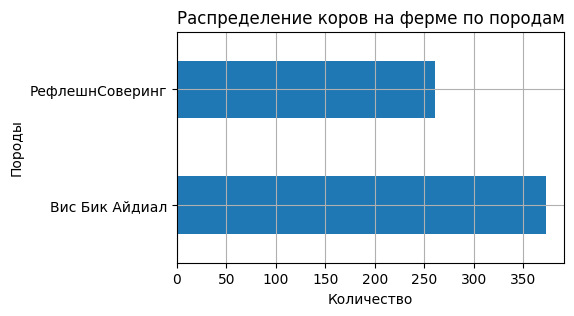

Отношение максимального значения к минимальному: 1.43



In [12]:
# Построим столбчатую диаграмму распределения коров по породам
graphic_cat(ferma_main,
            'breed', 
           'Распределение коров на ферме по породам',
           'Породы')

На ферме содержатся коровы двух пород: Рефлешн Соверинг и Вис Бик Айдиал. Коров породы Вис Бик Айдиал на 43 % больше.

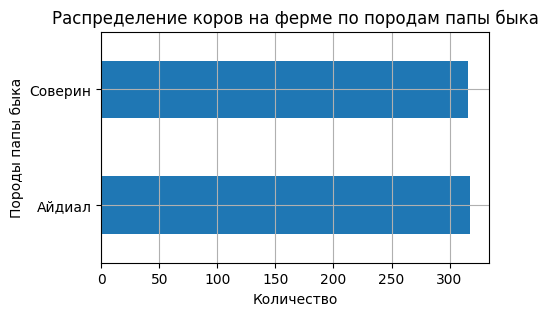

Отношение максимального значения к минимальному: 1.01



In [13]:
# Построим столбчатую диаграмму распределения коров по породам папы быка
graphic_cat(ferma_main,
            'papa_bull_breed', 
           'Распределение коров на ферме по породам папы быка',
           'Породы папы быка')

Соотношение коров по породам папы-быка равное.

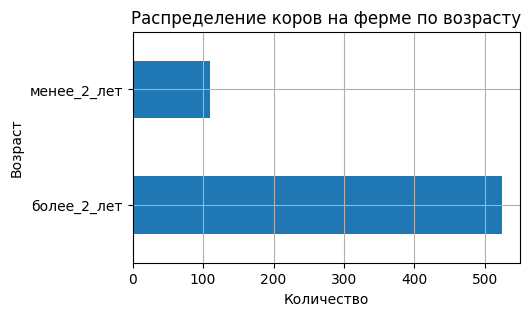

Отношение максимального значения к минимальному: 4.76



In [14]:
# Рассмотрим возраст коров
graphic_cat(ferma_main,
            'age', 
           'Распределение коров на ферме по возрасту',
           'Возраст')

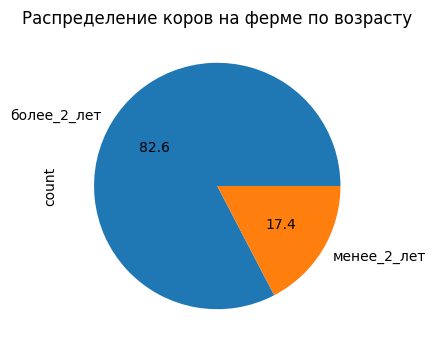

In [15]:
#Построим круговую диаграмму с указанием процентного соотношения численности коров по возрасту
fig = plt.figure(figsize=(6, 4))
ax = ferma_main['age'].value_counts().plot.pie(autopct='%.1f')
plt.title('Распределение коров на ферме по возрасту')
plt.show()

На ферме коров в возрасте более 2 лет 82,6 %, а коров в возрасте менее 2 лет - только 17,4 %.

### Изучение характеристик корма

In [16]:
# Напишем функцию построения графиков для количественных признаков
# функция принимает на вход датафрейм, столбец, число корзин, заголовок графика
def graphics(data, characteristic, num_bins, feature_title):
    # задаём общую схему из двух графиков
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle(feature_title)
    # первый график гистограмма распределения
    data[characteristic].plot(kind='hist', bins=num_bins, ax=axes[0], grid=True, edgecolor='b')
    axes[0].set_title('Гистограмма распределения')
    # второй график `ящик с усами`
    data[characteristic].plot(kind='box', ax=axes[1], grid=True)
    axes[1].set_title('Разброс значений признаков')
    plt.show()

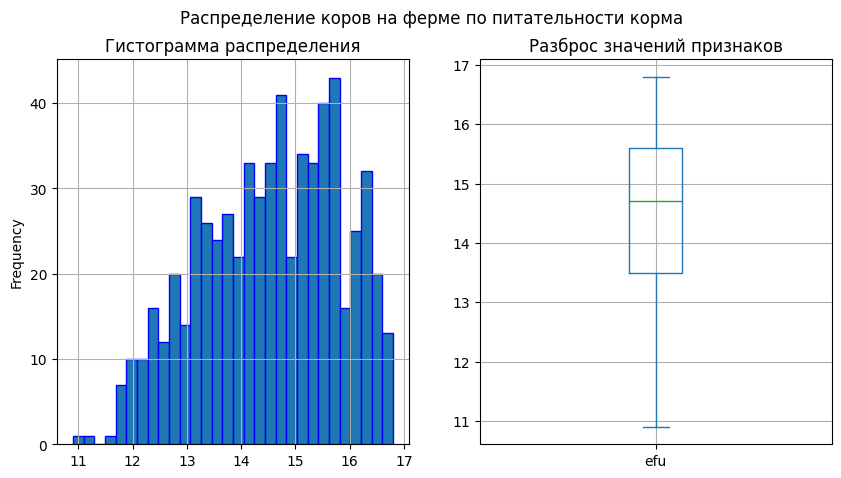

In [17]:
# Построим графики распределения кормов на ферме по питательности корма
graphics(ferma_main, 
         'efu', 
         30, 
         'Распределение коров на ферме по питательности корма')

Распределение коров по питательности корма несимметричное. Медианное значение примерно 14,7 смещено в сторону больших значений. Чем меньше питательность корма, тем меньше коров его получают. Половина коров на ферме получает от 13,5 до 15,6 кормовых единиц. Разброс значений маленький. Выбросов в данных нет, улучшать данные по этому показателю не требуется.

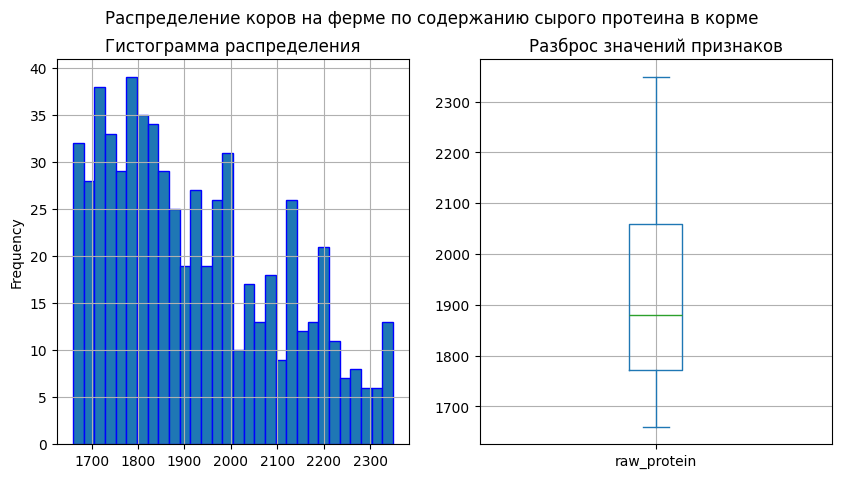

In [18]:
# Построим графики распределения кормов по содержанию сырого протеина в корме в столбце `raw_protein`
graphics(ferma_main, 
         'raw_protein', 
         30, 
         'Распределение коров на ферме по содержанию сырого протеина в корме')

Распределение коров по содержанию сырого протеина в корме показывает, что распределение также неравномерное, медианное значение смещено в сторону низких значений - менее 1900 г. Чем больше содержание сырого протеина в корме, тем меньше коров получают такой корм. Половина коров получает от 1772 до 2059 г протеина. Разброс значений небольшой. Выбросы в данных отсутствуют, улучшать данные не требуется.

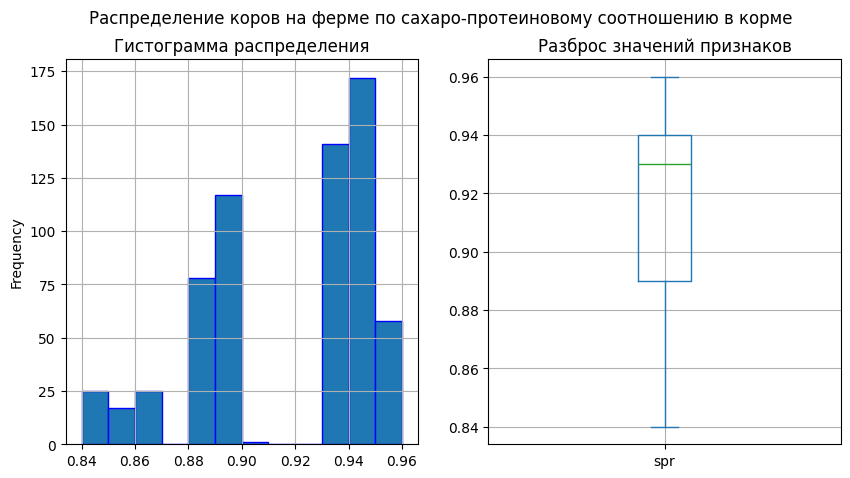

In [19]:
# Построим графики распределения кормов по сахаро-протеиновому соотношению в корме в столбце `spr`
graphics(ferma_main, 
         'spr', 
         12, 
         'Распределение коров на ферме по сахаро-протеиновому соотношению в корме')

Данные по показателю сахаро-протеинового соотношения распределены скачкообразно, однако здесь также нет аномальных значений. Чаще всего встречаются значения СПО 0,93-0,94 и 0,88-0,89. Другие значения встречаются реже. Разброс данных очень маленький.

### Изучение характеристик пастбища

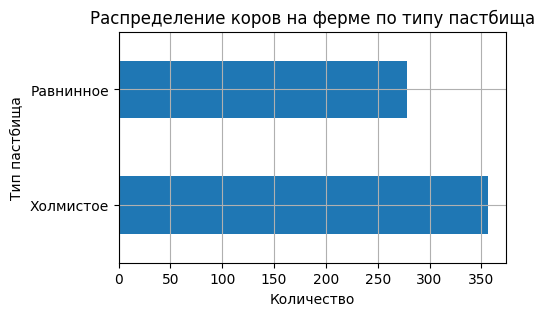

Отношение максимального значения к минимальному: 1.28



In [20]:
# Рассмотрим распределение коров по типам пастбища
graphic_cat(ferma_main,
            'pasture', 
            'Распределение коров на ферме по типу пастбища',
            'Тип пастбища')

Число коров, пасущихся на холмистых пастбищах, на 28 % больше числа коров, пасущихся на равнинных пастбищах.

### Изучение характеристик молока

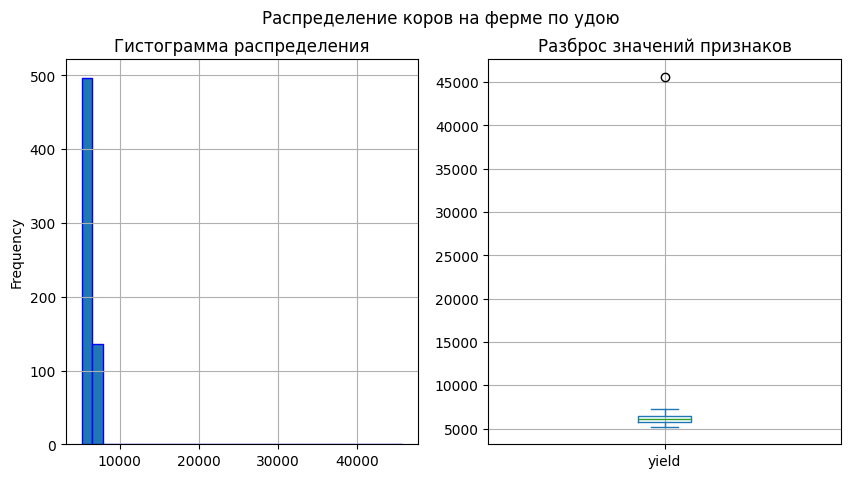

In [21]:
# Рассмотрим распределение коров по удою в столбце `yield`
graphics(ferma_main, 
         'yield', 
         30, 
         'Распределение коров на ферме по удою')

На гистограмме видно, что существуют аномальные значения, так как столбцы есть на гистограмме слева, а справа видны небольшие значения. `Ящик с усами` подтверждает наличие одного аномального значения более 45000 кг. Проверим это. Отсортируем значения в порядке убывания и выведем на экран первые строки.

In [22]:
print(ferma_main['yield'].sort_values(ascending=False).head())

id
17     45616
71      7222
136     7207
297     7201
295     7197
Name: yield, dtype: int64


Действительно, в столбце `yield` одно аномальное значение. Удалим его.

In [23]:
len(ferma_main)

634

In [24]:
ferma_main = ferma_main[ferma_main['yield'] < 8000]
len(ferma_main)

633

In [25]:
#Проверим, выведя на экран 5 самых больших значений в столбце `yield`
print(ferma_main['yield'].sort_values(ascending=False).head())

id
71     7222
136    7207
297    7201
295    7197
594    7174
Name: yield, dtype: int64


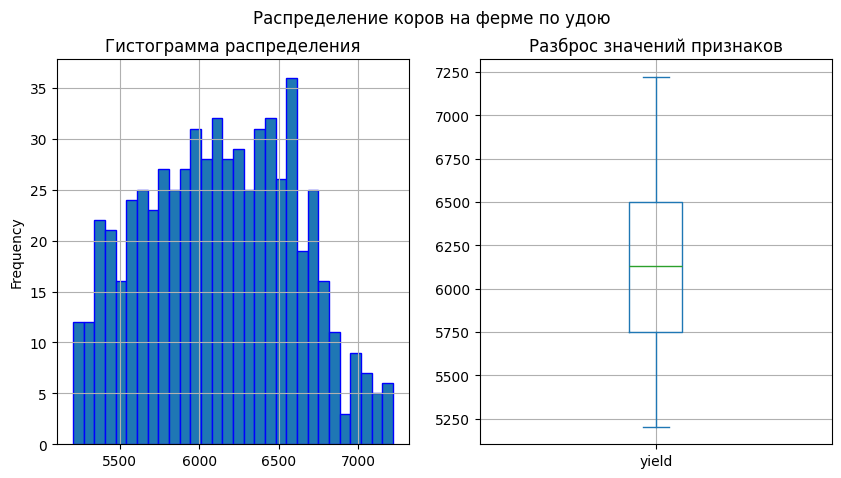

In [26]:
# Снова построим гистограмму распределения коров по удою в столбце `yield`
graphics(ferma_main, 
         'yield', 
         30, 
         'Распределение коров на ферме по удою')

Выбросы отсутствуют, данные корректные. Удой молока на ферме от каждой коровы больше 5000, максимальное значение 7222 кг. Распределение похоже на нормальное.

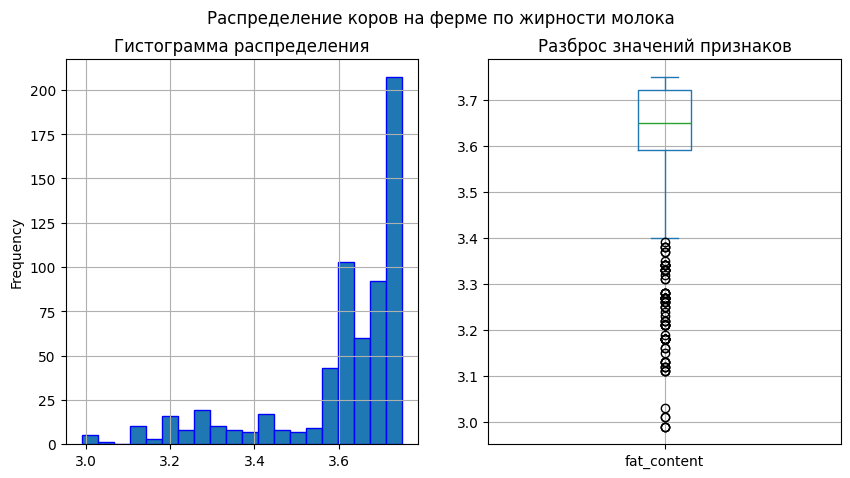

In [27]:
# Построим гистограмму распределения коров по жирности молока в столбце `fat_content`
graphics(ferma_main, 
         'fat_content', 
         20, 
         'Распределение коров на ферме по жирности молока')

Большинство коров имеют жирность молока выше 3,6 %. Судя по графикам, показатели жирности молока ниже 3,4 % как будто являются выбросами, но таких значений много, поэтому считать выбросами их не будем. Похоже, в пониженной жирности молока ничего аномального нет. Видимо, есть объективные причины, когда жирность молока понижена.

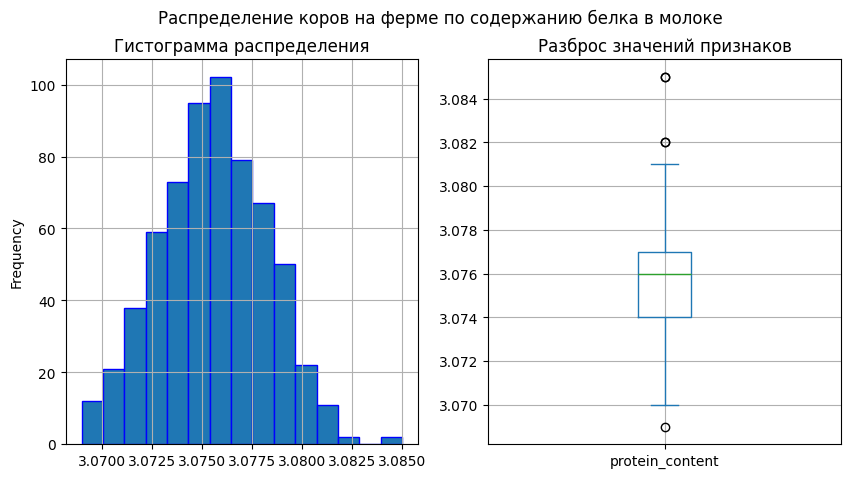

In [28]:
# Построим гистограмму распределения коров по содержанию белка в молоке в столбце `protein_content`
graphics(ferma_main, 
         'protein_content', 
         15, 
         'Распределение коров на ферме по содержанию белка в молоке')

Распределение данных по содержанию белка в молоке похоже на нормальное, аномальные данные присутствуют, но их удалять не будем, так как содержание белка в молоке, как и жирность молока, может отличаться очень сильно.

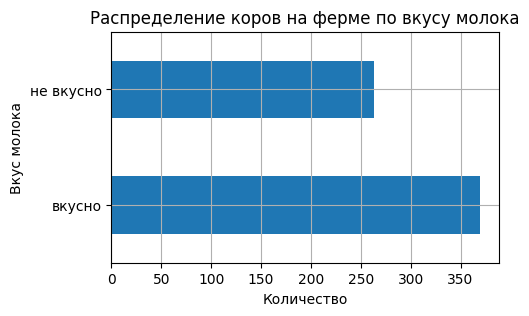

Отношение максимального значения к минимальному: 1.41



In [29]:
# Рассмотрим вкус молока в столбце `milk_taste`
graphic_cat(ferma_main,
            'milk_taste', 
            'Распределение коров на ферме по вкусу молока',
            'Вкус молока')

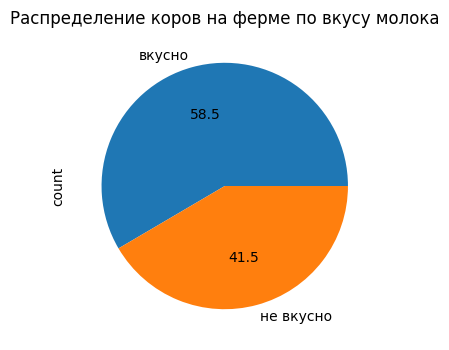

In [30]:
#Построим круговую диаграмму
fig = plt.figure(figsize=(6, 4))
ax = ferma_main['milk_taste'].value_counts().plot.pie(autopct='%.1f')
plt.title('Распределение коров на ферме по вкусу молока')
plt.show()

У 58,5 % коров на ферме молоко вкусное, у 41,5 % коров - не вкусное.

**Вывод.** На ферме содержатся коровы двух пород: Рефлешн Соверинг и Вис Бик Айдиал. Коров породы Вис Бик Айдиал на 43 % больше. Соотношение коров по породам папы-быка равное: Соверин и Айдиал.  
На ферме коров в возрасте более 2 лет 82,6 %, а коров в возрасте менее 2 лет - только 17,4 %.
Половина коров на ферме получает от 13,5 до 15,5 кормовых единиц. Медианное значение смещено в сторону больших значений, чем меньше питательность корма, тем меньше коров его получают. Распределение коров по содержанию сырого протеина в корме показывает, что больше всего значений данного показатели имеют низкие показатели, медианное значение смещено в сторону низких значений - менее 1900 г. Чем больше содержание сырого протеина в корме, тем меньше коров получают такой корм. Данные по показателю сахаро-протеинового соотношения распределены скачкообразно. Чаще всего встречаются значения СПО 0,93-0,94 и 0,88-0,89. Другие значения встречаются реже.
Число коров, пасущихся на холмистых пастбищах, на 28 % больше числа коров, пасущихся на равнинных пастбищах.
Данные по характеристикам кормов, коров и пастбищ корректные, улучшать их не требуется.
Данные по удою молока имели один выброс, который был удалён. Удой молока составляет от 5204 до 7222 кг.
Большинство коров имеют жирность молока выше 3,6 %. Жирность молока ниже 3,4 % является выбросами, но этих выбросов так много, что с ними ничего делать для улучшения данных нельзя.
Распределение данных по содержанию белка в молоке похоже на нормальное, аномальные данные отсутствуют.
У 58,5 % коров на ферме молоко вкусное, у 41,5 % коров - не вкусное.
Итак, исходные данные исследованы, необходимые улучшения выполнены.

## Корреляционный анализ
### Матрица корреляции
Судя по графикам, построенным выше, распределение большинства количественных признаков отклоняется от нормального. Кроме того, имеются не только количественные, но и категориальные признаки. Для анализа корреляции используем матрицу `phik`.

In [31]:
ferma_main.head()

yield   efu  raw_protein    spr            breed    pasture  \
id                                                                
1    5863  14.2         1743  0.890   Вис Бик Айдиал  Равнинное   
2    5529  12.8         2138  0.890   Вис Бик Айдиал  Равнинное   
3    5810  14.0         1854  0.885  РефлешнСоверинг  Холмистое   
4    5895  12.4         2012  0.885  РефлешнСоверинг  Холмистое   
5    5302  12.8         1675  0.885   Вис Бик Айдиал  Равнинное   

   papa_bull_breed  fat_content  protein_content milk_taste          age  
id                                                                        
1           Айдиал         3.58            3.076     вкусно  более_2_лет  
2          Соверин         3.54            3.079     вкусно  менее_2_лет  
3          Соверин         3.59            3.074  не вкусно  более_2_лет  
4           Айдиал         3.40            3.075  не вкусно  более_2_лет  
5          Соверин         3.73            3.073     вкусно  менее_2_лет

In [32]:
# Построим матрицу корреляции `phik`
# Создадим список с наименованиями непрерывных признаков
interval_cols = ['yield', 'efu', 'raw_protein', 'spr', 'fat_content', 'protein_content']

# Cчитаем корреляции
phik_overview = ferma_main.phik_matrix(interval_cols=interval_cols)
print(phik_overview.shape)

(11, 11)


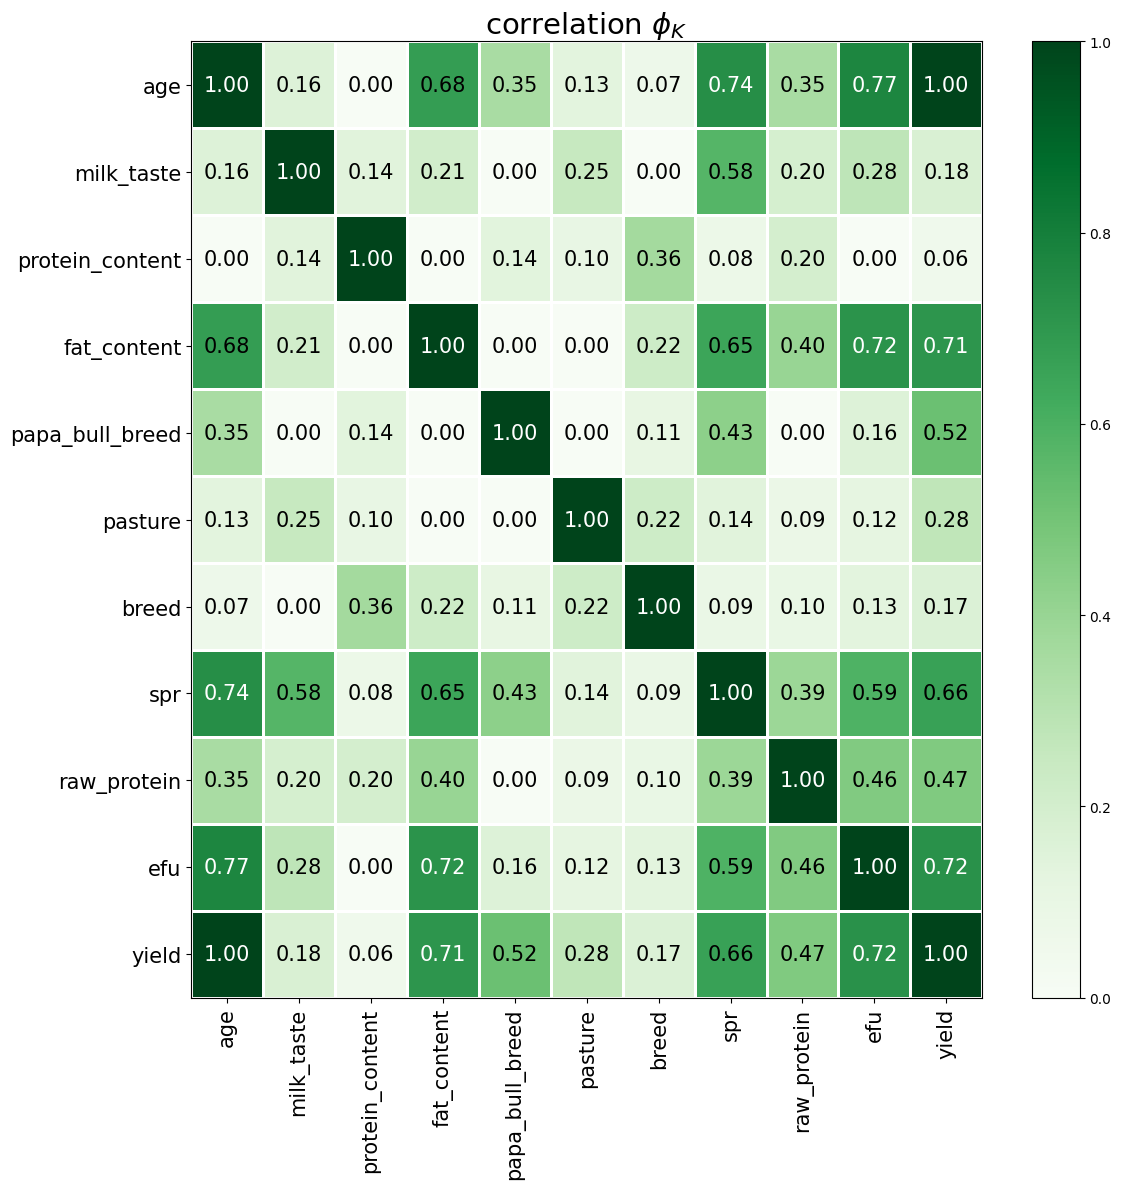

In [33]:
# Построим матрицу `phik`
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(12, 12)
)

За целевой признак принимаем `yield` (удой).  
Судя по тепловой карте, самая сильная связь у признака `Удой` с признаком `Возраст`, сила связи равна единице.
Сильная связь у признака `Удой` с признаками `efu` (энергетическая кормовая единица), `fat_content` (содержание жиров в молоке), `spr` (сахаро-протеиновое соотношение). Кроме того, связь заметна с признаками `papa_bull_breed` (порода папы быка), а также `raw_protein` (содержание сырого протеина в корме).  
Связь между входными и целевым признаками имеется, поэтому линейные модели должны сработать хорошо.  

Связь между независимыми переменными не превышает 0.77, то есть мультиколлинеарность отсутствует.

### Диаграммы рассеяния  
Проверить характер связи между количественными признаками можно с помощью диаграммы рассеяния.

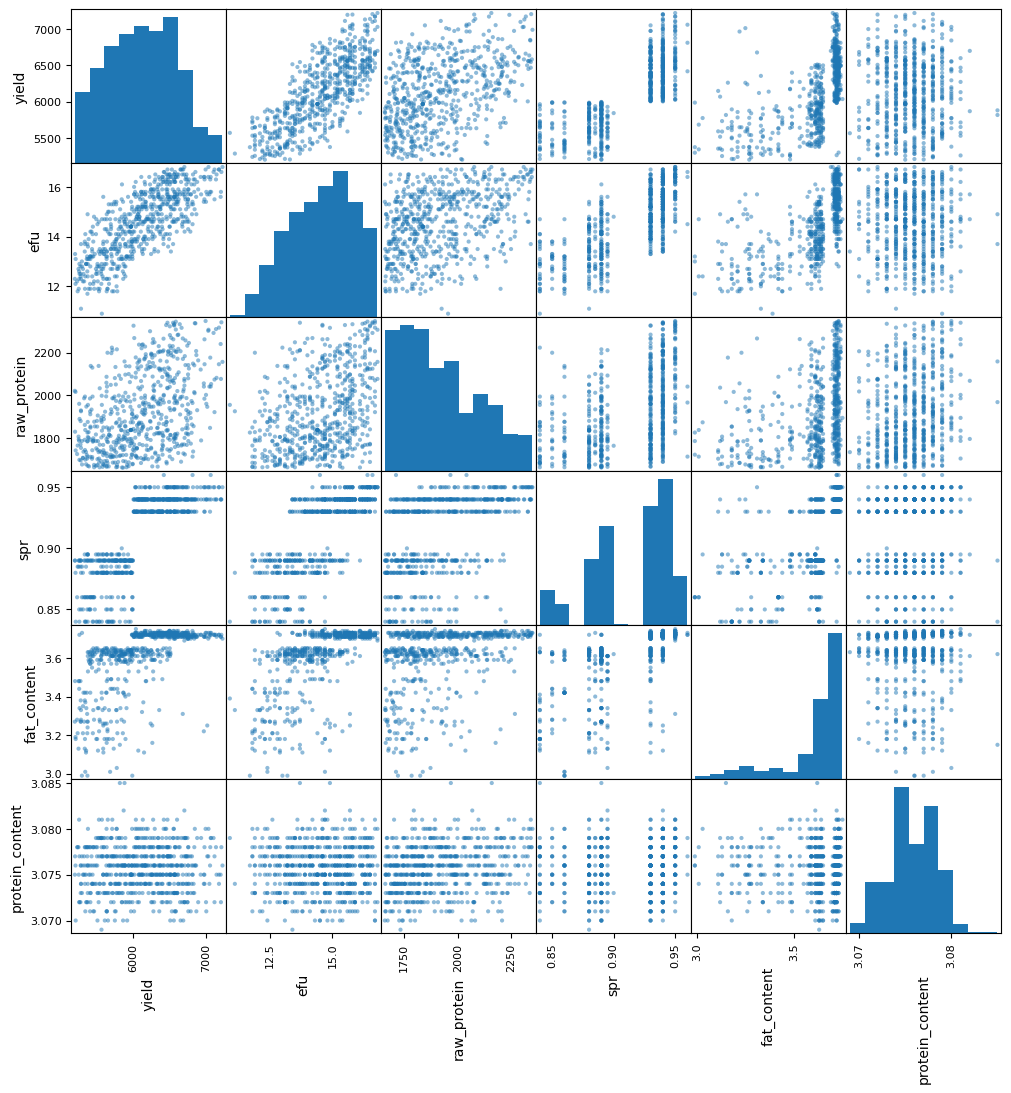

In [34]:
# Построим матрицу рассеяния
scatter_matrix = pd.plotting.scatter_matrix(
    ferma_main[interval_cols],
    figsize=(12, 12)
)
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)
plt.show()

На матрице рассеяния зависимость просматривается между признаками `yield` (удой) и `efu` (энергетическая кормовая единица), между признаками `yield` (удой) и `spr` (сахаро-протеиновое соотношение), а также между признаками `yield` (удой) и `raw_protein` (содержание сырого протеина в корме). Кроме того, видна зависимость между признаками `efu` и `raw_protein`, а также между `efu` и `far_content`, между `raw_protein` и `protein_content`.  

Построим диаграммы рассеяния между удоем и количественными признаками в разбивке по категориальным признакам.

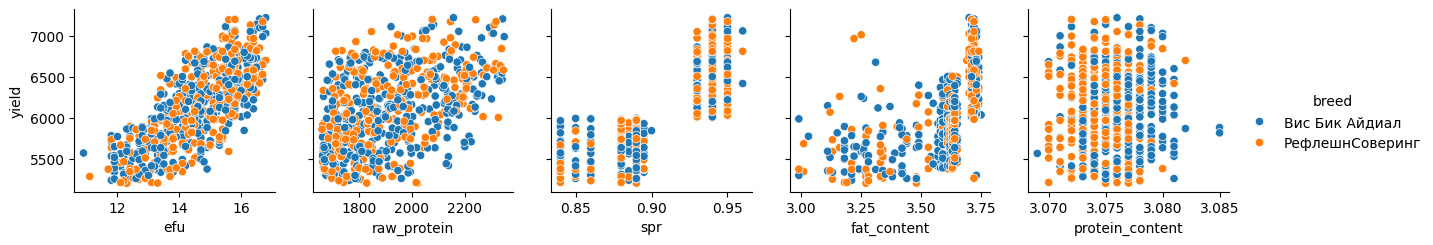

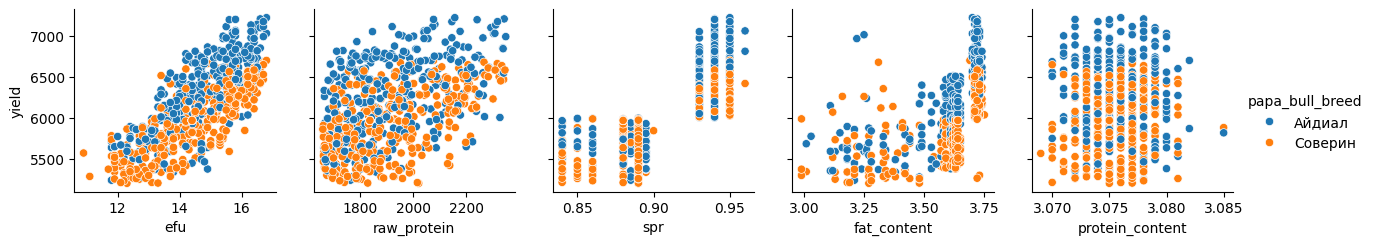

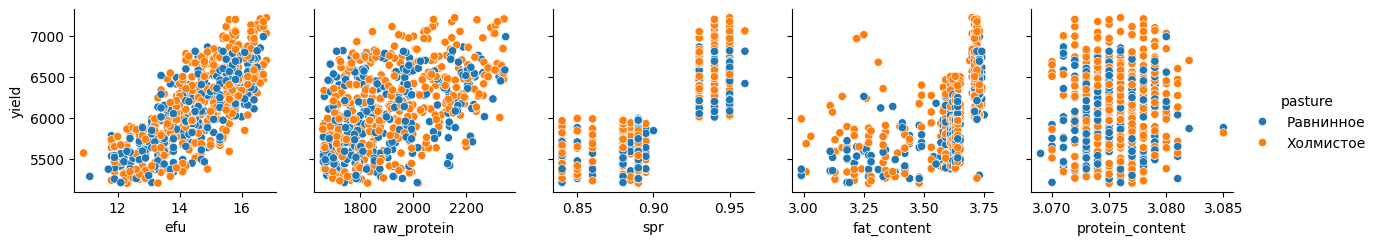

In [35]:
# Выбираем категориальные признаки
cat = ['breed', 'papa_bull_breed', 'pasture']
# Выбираем количественные признаки
x_vars = ['efu', 'raw_protein', 'spr', 'fat_content', 'protein_content']

# Строим графики взаимосвязи количественных признаков с удоем в разбивке по категориальным признакам
for category in cat:
    g = sns.PairGrid(ferma_main, hue = category, x_vars=x_vars, y_vars='yield')
    g.map(sns.scatterplot)
    g.add_legend()
    plt.show()

Порода коровы имеет значение при рассмотрении зависимости удоя и содержания белка в молоке: у коров породы Айдиал содержание белка в молоке выше при равных удоях, чем у коров породы Соверин.  
Порода папы имеет значение при анализе взаимосвязи удоя со всеми рассматриваемыми признаками: при равных значениях всех признаков удой коров от папы породы Айдиал выше.  
Тип пастбища указывает на то, что при равных значениях всех признаков удой выше у коров, пасущихся на холмистых пастбищах.

**Выводы.** 
1. Имеется зависимость удоя от ЭКЕ, сахаро-протеинового соотношения и содержания сырого протеина в корме: чем больше этих добавок, тем выше удой.  
2. Зависимость между удоем и ЭКЕ по внешнему виду графика больше похожа на квадратичную, чем на линейную.
3. Связь между удоем и содержанием сырого протеина в корме больше похожа на линейную.
4. Связь между удоем и всеми другими показателями в разбивке по породе папы показывает, что для удоя лучше коровы от папы породы Айдиал.
5. Тип пастбища влияет на зависимость разных признаков и удоя: на холмистых пастбищах коровы показывают более высокие удои при одинаковых значениях других признаков.
6.  Связь между удоем и `spr` (сахаро-протеиновым отношением) сильная, судя по матрице корреляции, однако на графике видно, что на линейную она не похожа. На графике явно выражены два кластера.
7.  Мультиколлинеарности не выявлено.
8.  Связь между целевым признаком и входными имеется, и достаточно выраженная, поэтому линейные модели должны сработать хорошо.

## Обучение модели линейной регрессии

Напишем функцию, которая обучает модель линейной регрессии.

In [36]:
def learning_linear_model(X, y, cat_col_names, num_col_names):
    
    # Разделение на тренировочную и тестовую выборки
    RANDOM_STATE = 42
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        random_state = RANDOM_STATE)
    
    # Проверка категориальных признаков
    print(f'Количество уникальных значений в категориальных признаках: \n{X_train[cat_col_names].nunique()}')
    
    # Проверка количественных признаков тренировочного датасета
    #print('Распределение количественных признаков')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    fig.suptitle('Распределение количественных признаков')
    X_train[num_col_names].plot(kind='hist', bins=30, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    X_train[num_col_names].plot(kind='box', ax=axes[1])
    axes[1].set_title('Разброс значений признаков')
    plt.show()
    
    # Кодирование категориальных признаков
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    encoder_col_names = encoder.get_feature_names_out()
    
    # Масштабирование количественных признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    #Создание датафреймов из закодированных и масштабированных данных
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    # Объединение датафреймов
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    #print('Распределение количественных признаков после масштабирования')
    # Построим графики для количественных признаков тренировочного датасета после масштабирования:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    fig.suptitle('Распределение количественных признаков после масштабирования')
    X_train[num_col_names].plot(kind='hist', bins=30, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    X_train[num_col_names].plot(kind='box', ax=axes[1])
    axes[1].set_title('Разброс значений признаков')
    plt.show()
    
    # Инициализация и обучение модели
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    
    # Предсказанные значения для X_test
    predictions = model_lr.predict(X_test)
    
    # Оценим качество модели на тестовой выборке
    # Рассчитаем коэффициент детерминации R2 для линейной регрессии
    r2 = r2_score(y_test, predictions)
    print("R2 LinearRegression =", r2)
    
    # Проведем анализ остатков
    residuals = y_test - predictions
    
    # Построим графики по распределению остатков
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    axes[0].hist(x=residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    
    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

    fig = plt.figure(figsize=(6, 4))
    sns.residplot(x=predictions, y=residuals)
    plt.title('График остатков модели', fontsize=12)
    plt.xlabel('Предсказания модели')
    plt.ylabel('Остатки')
    plt.show()
    
    # Функция возвращает кодировщик, scaler, обученную модель, метрику, предсказания, остатки,
    # тестовые значения целевого признака, входные признаки тренировочной выборки
    # (все эти данные понадобятся в дальнейшем)
    return encoder, scaler, model_lr, r2, predictions, residuals, y_test, X_train

### Первая модель
Обучим модель линейной регрессии. В качестве целевого признака принимаем `yield` (удой). В качестве входных признаков выбираем `spr` (сахаро-протеиновое соотношение), `efu` (показатель питательности корма коровы), `raw_protein` (содержание сырого протеина в корме, г),  так как эти признаки показали наличие зависимости между признаками, предположительно, линейной. К входным признакам отнесём также `age` (возраст коровы), этот признак очень сильно влияет на удой, как мы убедились с помощью матрицы корреляции. По логике, причинно-следственные связи должны быть между удоем и такими признаками как `breed` (порода коровы), `pasture` (тип пастбища), `papa_bull_bread` (порода папы коровы). 

Количество уникальных значений в категориальных признаках: 
breed              2
pasture            2
papa_bull_breed    2
age                2
dtype: int64


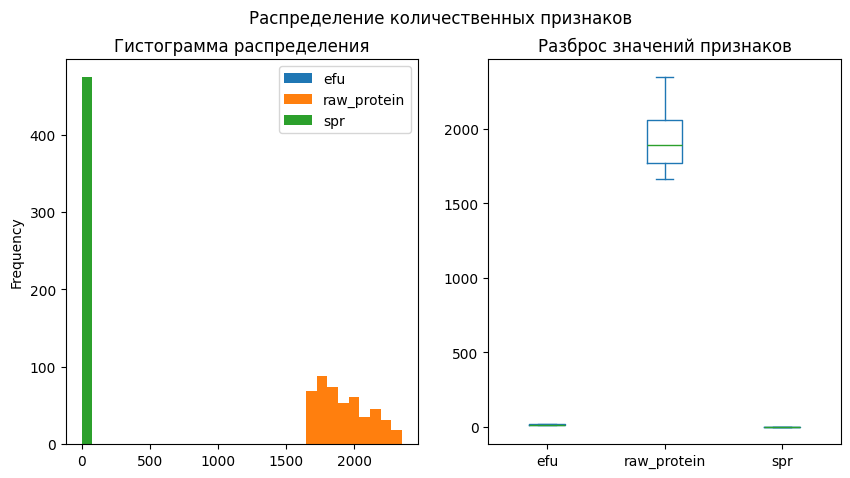

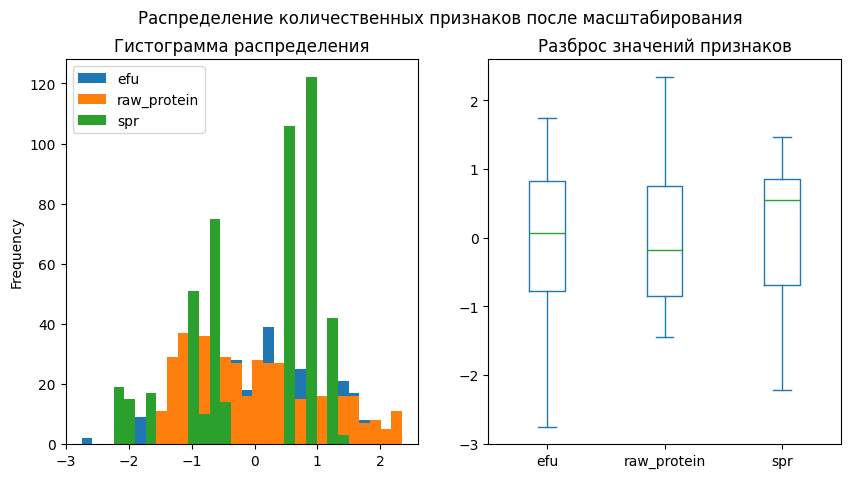

R2 LinearRegression = 0.7526889845143692


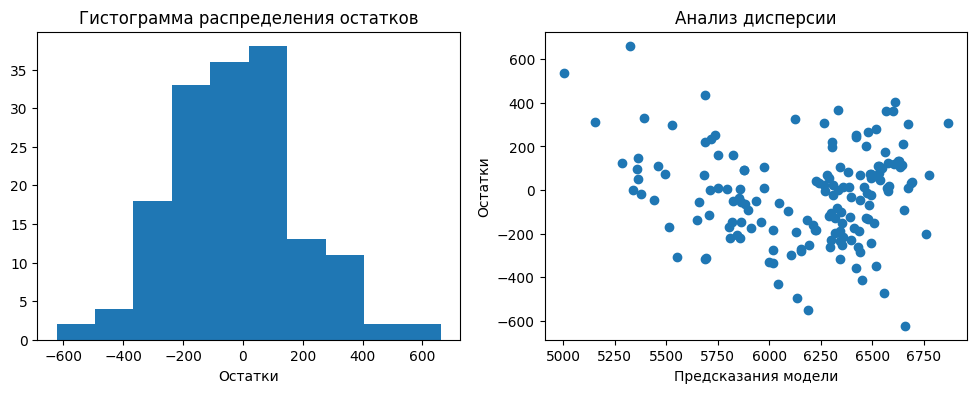

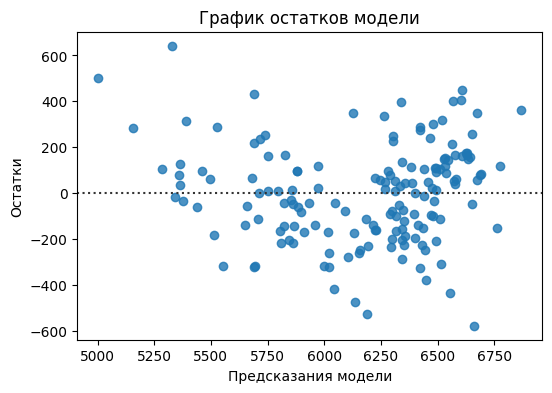

In [37]:
# Сохранение выборок для первой модели
X_1 = ferma_main[['efu', 'raw_protein', 'spr', 'breed', 'pasture', 'papa_bull_breed', 'age']]
y_1 = ferma_main['yield']

# Список категориальных признаков и список количественных признаков для первой модели
cat_col_names_1 = ['breed', 'pasture', 'papa_bull_breed', 'age']
num_col_names_1 = ['efu', 'raw_protein', 'spr']

# Вызываем функцию обучения первой модели линейной регрессии
encoder_1, scaler_1, model_lr_1, r2_1, predictions_1, residuals_1, y_test_1, X_train_1 = learning_linear_model(
    X_1, y_1, cat_col_names_1, num_col_names_1)

Коэффициент детерминации R2 имеет значение 0,75.  
Гистограмма имеет распределение, в целом похожее на нормальное.  
На диаграмме рассеяния дисперсии остатков виден `рупор`. Прогнозным значениям модели в левой части графика соответствует меньший разброс остатков модели, чем в правой части графика. С увеличением прогнозных значений дисперсия остатков становится всё больше.  
Необходимо улучшать модель. Нужно либо найти и добавить в модель дополнительные признаки, либо трансформировать имеющиеся данные, чтобы изменить характер взаимосвязи входных признаков с целевым.

### Вторая модель
Подготовим данные с учётом связи входных признаков с целевым и обучим на них вторую модель LinearRegression.  
Рассмотрим диаграммы рассеяния (п. 4.2). На диаграмме видно, что признаки `spr` и `yield` (СПО и Удой) связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём значение СПО, равное `0.92`, можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.

In [38]:
# Для преобразования СПО в бинарный признак создадим копию датафрейма `ferma_main` - `main_2`
# добавим в датафрейм `main-2` столбец `spr_cat` с категориальными значениями СПО
main_2 = ferma_main.copy()
main_2['spr_cat'] = main_2['spr'].apply(lambda x: 'высокое' if x >= 0.92 else 'низкое')
main_2.head(10)

yield   efu  raw_protein    spr            breed    pasture  \
id                                                                
1    5863  14.2         1743  0.890   Вис Бик Айдиал  Равнинное   
2    5529  12.8         2138  0.890   Вис Бик Айдиал  Равнинное   
3    5810  14.0         1854  0.885  РефлешнСоверинг  Холмистое   
4    5895  12.4         2012  0.885  РефлешнСоверинг  Холмистое   
5    5302  12.8         1675  0.885   Вис Бик Айдиал  Равнинное   
6    5254  12.7         1806  0.885  РефлешнСоверинг  Холмистое   
7    5910  13.2         1792  0.885   Вис Бик Айдиал  Равнинное   
8    6179  14.7         1806  0.930   Вис Бик Айдиал  Равнинное   
9    6783  14.2         1918  0.940  РефлешнСоверинг  Холмистое   
10   5339  13.4         1791  0.895   Вис Бик Айдиал  Холмистое   

   papa_bull_breed  fat_content  protein_content milk_taste          age  \
id                                                                         
1           Айдиал         3.58            3.076     вкусно  более_2_лет   
2          Соверин         3.54            3.079     вкусно  менее_2_лет   
3          Соверин         3.59            3.074  не вкусно  более_2_лет   
4           Айдиал         3.40            3.075  не вкусно  более_2_лет   
5          Соверин         3.73            3.073     вкусно  менее_2_лет   
6          Соверин         3.13            3.078     вкусно  менее_2_лет   
7          Соверин         3.48            3.077     вкусно  более_2_лет   
8           Айдиал         3.55            3.076     вкусно  более_2_лет   
9           Айдиал         3.71            3.077     вкусно  более_2_лет   
10         Соверин         3.13            3.075     вкусно  менее_2_лет   

    spr_cat  
id           
1    низкое  
2    низкое  
3    низкое  
4    низкое  
5    низкое  
6    низкое  
7    низкое  
8   высокое  
9   высокое  
10   низкое

Кроме того, по виду диаграммы рассеяния можно предположить, что признаки `efu` и `yield` (ЭКЕ и Удой) также связаны нелинейно, зависимость похожа на квадратичную. Нелинейность между этими признаками попробуем исключить, введя новый признак `ЭКЕ в квадрате`.

In [39]:
# Добавим в датафрейм `main-2` столбец `efu_2` с новым признаком 'ЭКЕ в квадрате'
main_2['efu_2'] = main_2['efu'].apply(lambda x: x**2)
main_2.head()

yield   efu  raw_protein    spr            breed    pasture  \
id                                                                
1    5863  14.2         1743  0.890   Вис Бик Айдиал  Равнинное   
2    5529  12.8         2138  0.890   Вис Бик Айдиал  Равнинное   
3    5810  14.0         1854  0.885  РефлешнСоверинг  Холмистое   
4    5895  12.4         2012  0.885  РефлешнСоверинг  Холмистое   
5    5302  12.8         1675  0.885   Вис Бик Айдиал  Равнинное   

   papa_bull_breed  fat_content  protein_content milk_taste          age  \
id                                                                         
1           Айдиал         3.58            3.076     вкусно  более_2_лет   
2          Соверин         3.54            3.079     вкусно  менее_2_лет   
3          Соверин         3.59            3.074  не вкусно  более_2_лет   
4           Айдиал         3.40            3.075  не вкусно  более_2_лет   
5          Соверин         3.73            3.073     вкусно  менее_2_лет   

   spr_cat   efu_2  
id                  
1   низкое  201.64  
2   низкое  163.84  
3   низкое  196.00  
4   низкое  153.76  
5   низкое  163.84

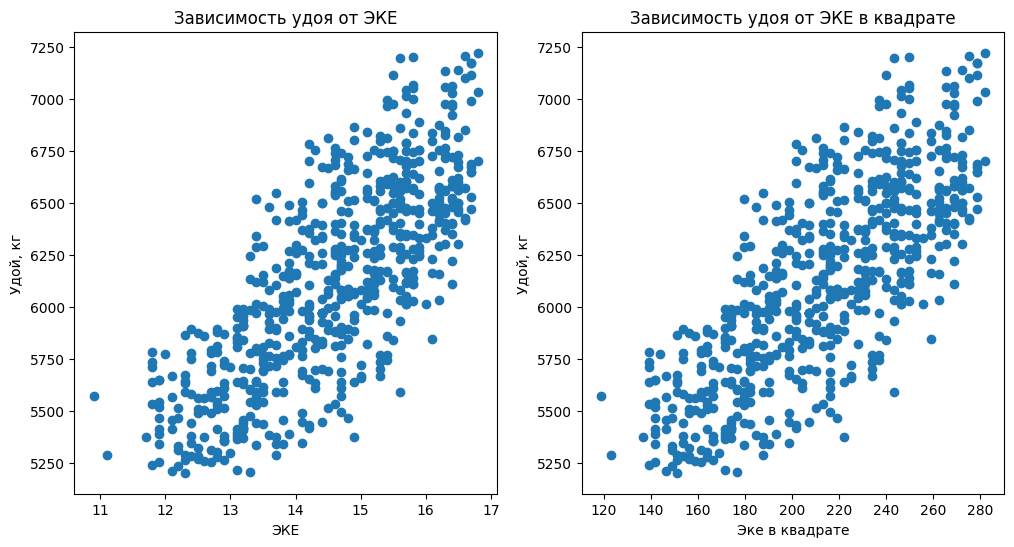

In [40]:
# Построим два графика зависимости ЭКЕ с удоем и ЭКЕ в квадрате с удоем
# разместим два графика рядом друг с другом
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].scatter(data=main_2, x='efu', y='yield')
axes[0].set_xlabel('ЭКЕ')
axes[0].set_ylabel('Удой, кг')
axes[0].set_title('Зависимость удоя от ЭКЕ')
axes[1].scatter(data=main_2, x='efu_2', y='yield')
axes[1].set_xlabel('Эке в квадрате')
axes[1].set_ylabel('Удой, кг')
axes[1].set_title('Зависимость удоя от ЭКЕ в квадрате')
plt.show()

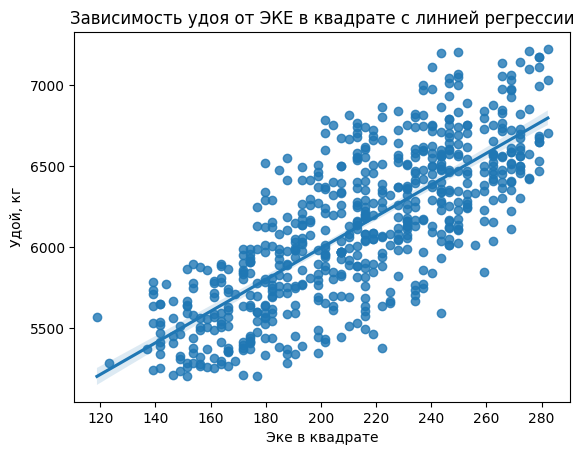

In [41]:
# Проведём линию регрессии на графике с ЭКЕ в квадрате
sns.regplot(data=main_2, x='efu_2', y='yield')
plt.title('Зависимость удоя от ЭКЕ в квадрате с линией регрессии')
plt.xlabel('Эке в квадрате')
plt.ylabel('Удой, кг')
plt.show()

In [42]:
# Посчитаем коэффициент корреляции Пирсона для `efu` и `efu_2` с целевым признаком
print('Коэффициент корреляции для efu', round(main_2['efu'].corr(main_2['yield']), 5))
print('Коэффициент корреляции для efu_2', round(main_2['efu_2'].corr(main_2['yield']), 5))

Коэффициент корреляции для efu 0.76503
Коэффициент корреляции для efu_2 0.76554


Коэффициент корреляции для `efu_2` выше, чем для `efu`.  
Будем считать, что мы убрали нелинейность признака. Cтроим новую модель. В качестве целевого признака остаётся `yield` (удой). В качестве входных признаков выбираем `spr_cat` (сахаро-протеиновое соотношение в категориальном виде), `efu_2` (показатель питательности корма коровы, возведённый в квадрат), остальные признаки без изменений: `raw_protein` (содержание сырого протеина в корме, г), `age` (возраст коровы), `breed` (порода коровы), `pasture` (тип пастбища), `papa_bull_bread` (порода папы коровы).

Количество уникальных значений в категориальных признаках: 
spr_cat            2
breed              2
pasture            2
papa_bull_breed    2
age                2
dtype: int64


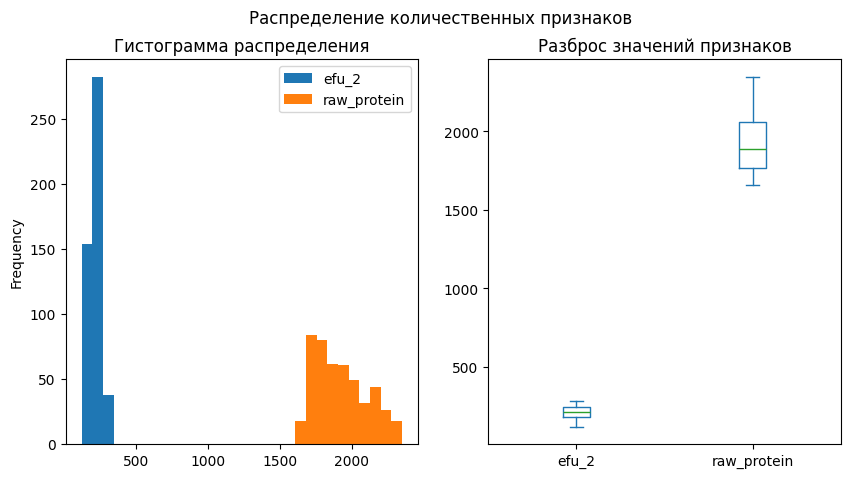

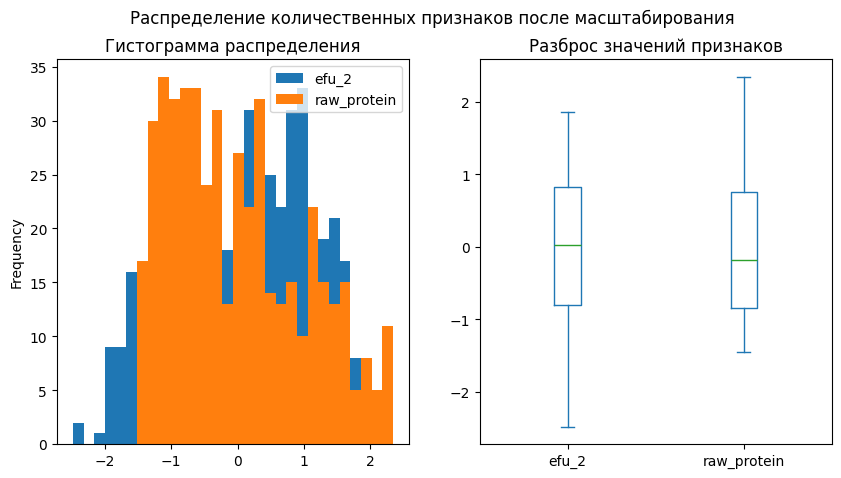

R2 LinearRegression = 0.7903877940199926


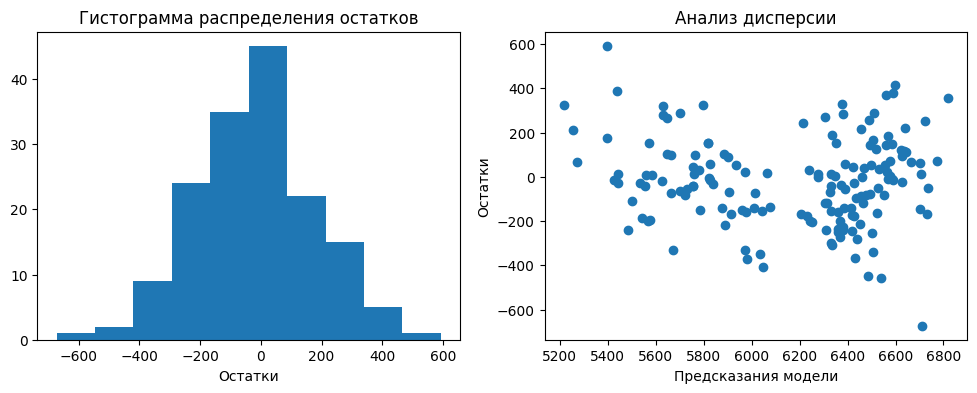

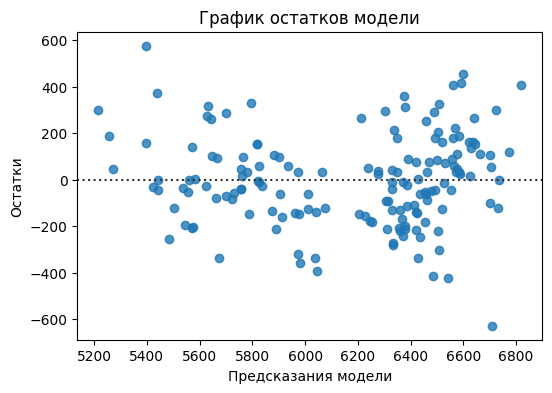

In [43]:
# Сохранение выборок для второй модели
X_2 = main_2[['efu_2', 'raw_protein', 'spr_cat', 'breed', 'pasture', 'papa_bull_breed', 'age']]
y_2 = main_2['yield']

# Список категориальных признаков и список количественных признаков для второй модели
cat_col_names_2 = ['spr_cat', 'breed', 'pasture', 'papa_bull_breed', 'age']
num_col_names_2 = ['efu_2', 'raw_protein']

# Вызываем функцию для обучения второй модели
encoder_2, scaler_2, model_lr_2, r2_2, predictions_2, residuals_2, y_test_2, X_train_2 = learning_linear_model(
    X_2, y_2, cat_col_names_2, num_col_names_2)

Коэффициент детерминации R2 во второй модели выше, чем в первой - 0,79.  
Гистограмма имеет распределение, похожее на нормальное, и это распределение более симметрично, чем первое.  
На диаграмме рассеяния дисперсии остатков всё ещё виден `рупор`. По прежнему с увеличением прогнозных значений дисперсия остатков становится больше.  
Необходимо ещё улучшать модель. Нужно найти и добавить в модель дополнительные признаки.  

### Третья модель
Добавим признак `Имя папы` из таблицы `dad`, соединив его с остальными данными таблицы `ferma_main`. Обучим на новых данных третью модель `LinearRegression`.

In [44]:
# Выполним слияние датафреймов `ferma_main` и `ferma_dad` методом 'merge()' по столбцу `id`,
# по умолчанию тип слияния `inner`
# новый датафрейм назовём `ferma_main_dad`
ferma_main_dad = ferma_main.merge(ferma_dad, on='id')

# Проверим
information(ferma_main_dad)

yield   efu  raw_protein    spr            breed    pasture  \
id                                                                
1    5863  14.2         1743  0.890   Вис Бик Айдиал  Равнинное   
2    5529  12.8         2138  0.890   Вис Бик Айдиал  Равнинное   
3    5810  14.0         1854  0.885  РефлешнСоверинг  Холмистое   
4    5895  12.4         2012  0.885  РефлешнСоверинг  Холмистое   
5    5302  12.8         1675  0.885   Вис Бик Айдиал  Равнинное   

   papa_bull_breed  fat_content  protein_content milk_taste          age  \
id                                                                         
1           Айдиал         3.58            3.076     вкусно  более_2_лет   
2          Соверин         3.54            3.079     вкусно  менее_2_лет   
3          Соверин         3.59            3.074  не вкусно  более_2_лет   
4           Айдиал         3.40            3.075  не вкусно  более_2_лет   
5          Соверин         3.73            3.073     вкусно  менее_2_лет   

   papa_name  
id            
1     Буйный  
2   Соловчик  
3      Барин  
4     Буйный  
5      Барин

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 1 to 627
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yield            633 non-null    int64  
 1   efu              633 non-null    float64
 2   raw_protein      633 non-null    int64  
 3   spr              633 non-null    float64
 4   breed            633 non-null    object 
 5   pasture          633 non-null    object 
 6   papa_bull_breed  633 non-null    object 
 7   fat_content      633 non-null    float64
 8   protein_content  633 non-null    float64
 9   milk_taste       633 non-null    object 
 10  age              633 non-null    object 
 11  papa_name        633 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 64.3+ KB


None

Устраним нелинейность между признаками  `spr` и `yield`, для этого преобразуем `spr` в категориальный бинарный признак. Нелинейность между признаками `efu` и `yield` исключим, введя новый признак `efu в квадрате`.

In [45]:
# Добавим в датафрейм `ferma_main_dad` столбец `spr_cat` с категориальными значениями СПО
ferma_main_dad['spr_cat'] = ferma_main_dad['spr'].apply(lambda x: 'высокое' if x >= 0.92 else 'низкое')
ferma_main_dad.head(10)

yield   efu  raw_protein    spr            breed    pasture  \
id                                                                
1    5863  14.2         1743  0.890   Вис Бик Айдиал  Равнинное   
2    5529  12.8         2138  0.890   Вис Бик Айдиал  Равнинное   
3    5810  14.0         1854  0.885  РефлешнСоверинг  Холмистое   
4    5895  12.4         2012  0.885  РефлешнСоверинг  Холмистое   
5    5302  12.8         1675  0.885   Вис Бик Айдиал  Равнинное   
6    5254  12.7         1806  0.885  РефлешнСоверинг  Холмистое   
7    5910  13.2         1792  0.885   Вис Бик Айдиал  Равнинное   
8    6179  14.7         1806  0.930   Вис Бик Айдиал  Равнинное   
9    6783  14.2         1918  0.940  РефлешнСоверинг  Холмистое   
10   5339  13.4         1791  0.895   Вис Бик Айдиал  Холмистое   

   papa_bull_breed  fat_content  protein_content milk_taste          age  \
id                                                                         
1           Айдиал         3.58            3.076     вкусно  более_2_лет   
2          Соверин         3.54            3.079     вкусно  менее_2_лет   
3          Соверин         3.59            3.074  не вкусно  более_2_лет   
4           Айдиал         3.40            3.075  не вкусно  более_2_лет   
5          Соверин         3.73            3.073     вкусно  менее_2_лет   
6          Соверин         3.13            3.078     вкусно  менее_2_лет   
7          Соверин         3.48            3.077     вкусно  более_2_лет   
8           Айдиал         3.55            3.076     вкусно  более_2_лет   
9           Айдиал         3.71            3.077     вкусно  более_2_лет   
10         Соверин         3.13            3.075     вкусно  менее_2_лет   

   papa_name  spr_cat  
id                     
1     Буйный   низкое  
2   Соловчик   низкое  
3      Барин   низкое  
4     Буйный   низкое  
5      Барин   низкое  
6      Барин   низкое  
7   Соловчик   низкое  
8   Геркулес  высокое  
9     Буйный  высокое  
10     Барин   низкое

In [46]:
# Добавим в датафрейм `ferma` столбец `efu_2` с признаком 'efu в квадрате'
ferma_main_dad['efu_2'] = ferma_main_dad['efu'].apply(lambda x: x**2)
ferma_main_dad.head()

yield   efu  raw_protein    spr            breed    pasture  \
id                                                                
1    5863  14.2         1743  0.890   Вис Бик Айдиал  Равнинное   
2    5529  12.8         2138  0.890   Вис Бик Айдиал  Равнинное   
3    5810  14.0         1854  0.885  РефлешнСоверинг  Холмистое   
4    5895  12.4         2012  0.885  РефлешнСоверинг  Холмистое   
5    5302  12.8         1675  0.885   Вис Бик Айдиал  Равнинное   

   papa_bull_breed  fat_content  protein_content milk_taste          age  \
id                                                                         
1           Айдиал         3.58            3.076     вкусно  более_2_лет   
2          Соверин         3.54            3.079     вкусно  менее_2_лет   
3          Соверин         3.59            3.074  не вкусно  более_2_лет   
4           Айдиал         3.40            3.075  не вкусно  более_2_лет   
5          Соверин         3.73            3.073     вкусно  менее_2_лет   

   papa_name spr_cat   efu_2  
id                            
1     Буйный  низкое  201.64  
2   Соловчик  низкое  163.84  
3      Барин  низкое  196.00  
4     Буйный  низкое  153.76  
5      Барин  низкое  163.84

Cтроим третью модель. В качестве целевого признака остаётся `yield` (удой). В качестве входных признаков выбираем `spr_cat` (сахаро-протеиновое соотношение в категориальном виде), `efu_2` (показатель питательности корма коровы, возведённый в квадрат), другие признаки без изменений: `raw_protein` (содержание сырого протеина в корме, г), `age` (возраст коровы), `breed` (порода коровы), `pasture` (тип пастбища), `papa_bull_bread` (порода папы коровы). И добавляется ещё один признак `papa_name`.

Количество уникальных значений в категориальных признаках: 
spr_cat            2
breed              2
pasture            2
papa_bull_breed    2
age                2
papa_name          4
dtype: int64


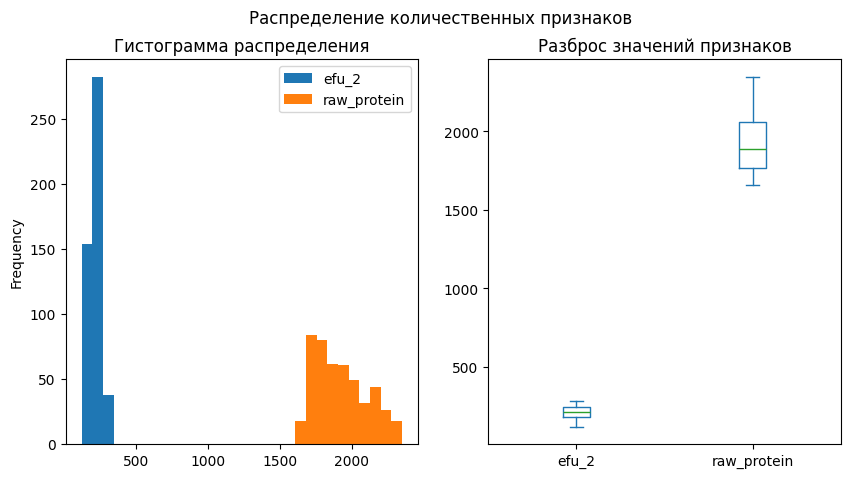

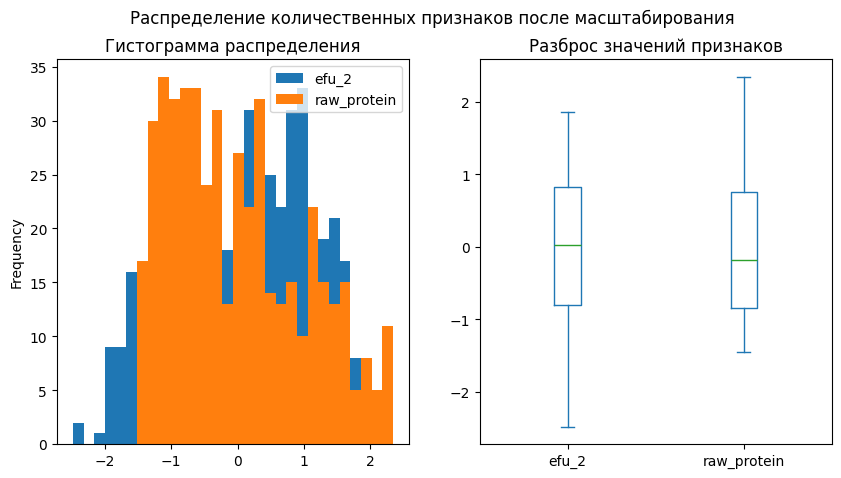

R2 LinearRegression = 0.802357742803108


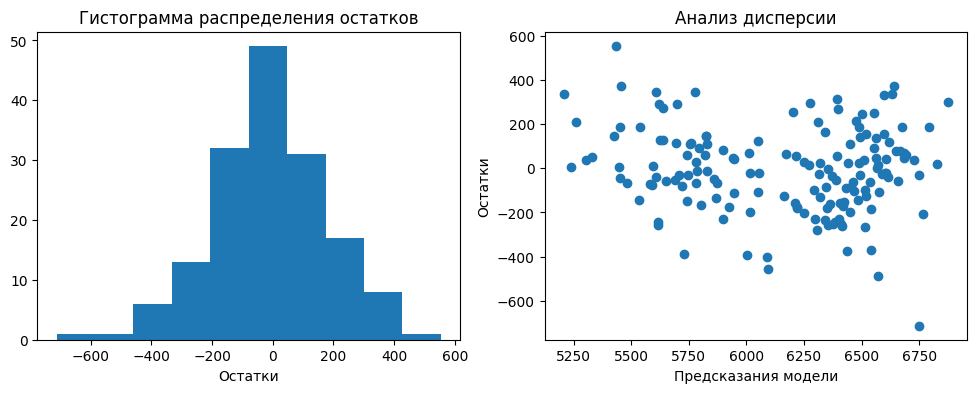

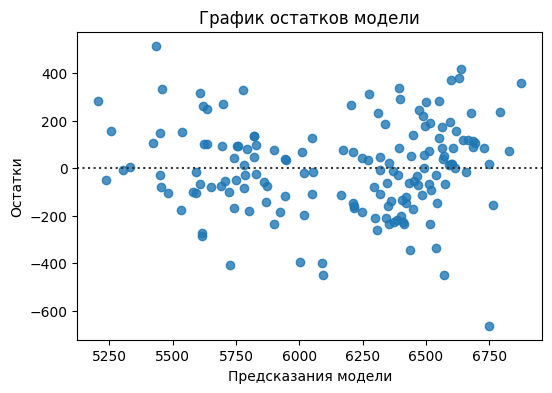

In [47]:
# Сохранение выборок для третьей модели
X_3 = ferma_main_dad[['efu_2', 'raw_protein', 'spr_cat', 'breed', 'pasture', 'papa_bull_breed', 'age', 'papa_name']]
y_3 = ferma_main_dad['yield']

# Список категориальных признаков и список количественных признаков для второй модели
cat_col_names_3 = ['spr_cat', 'breed', 'pasture', 'papa_bull_breed', 'age', 'papa_name']
num_col_names_3 = ['efu_2', 'raw_protein']

# Вызываем функцию для обучения третьей модели линейной регресси
encoder_3, scaler_3, model_lr_3, r2_3, predictions_3, residuals_3, y_test_3, X_train_3 = learning_linear_model(
    X_3, y_3, cat_col_names_3, num_col_names_3)

Коэффициент детерминации R2 в третьей модели выше, чем в первой и во второй - 0,80.  
Гистограмма имеет нормальное распределение, и это распределение стало ещё более симметричным, чем второе. Бимодальность отсутствует. Это означает, что модель более точна в своих предсказаниях удоя.  
Диаграмма рассеяния стала похожа на бабочку. Она показывает, что дисперсия остатков стала несколько более постоянной.

### Сравнение качества трёх моделей линейной регрессии
Сопоставим коэффициенты детерминации трёх моделей линейной регрессии и их остатки.

In [48]:
# Выведем на экран все три коэффициента детерминации
print("R2 LinearRegression =", round(r2_1, 2))
print("R2_2 LinearRegression =", round(r2_2, 2))
print("R2_3 LinearRegression =", round(r2_3, 2))

R2 LinearRegression = 0.75
R2_2 LinearRegression = 0.79
R2_3 LinearRegression = 0.8


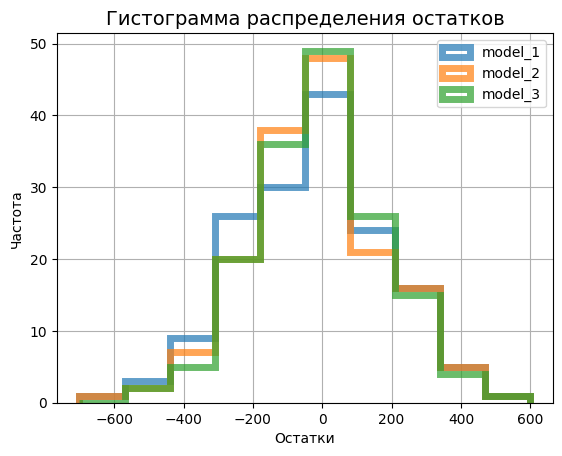

In [49]:
# Сопоставим остатки трёх моделей линейной регрессии на одном графике
# Совместим гистограммы на одном поле
ax = residuals_1.plot(
    kind='hist',
    histtype='step',
    range=(-700, 600),
    linewidth=5,
    alpha=0.7,
    label='model_1',
    legend=True,
)

residuals_2.plot(
    kind='hist',
    histtype='step',
    range=(-700, 600),
    linewidth=5,
    alpha=0.7,
    label='model_2',
    ax=ax,
    legend=True,
)

residuals_3.plot(
    kind='hist',
    histtype='step',
    range=(-700, 600),
    linewidth=5,
    alpha=0.7,
    label='model_3',
    ax=ax,
    grid=True,
    legend=True,
)

plt.title('Гистограмма распределения остатков', fontsize=14)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

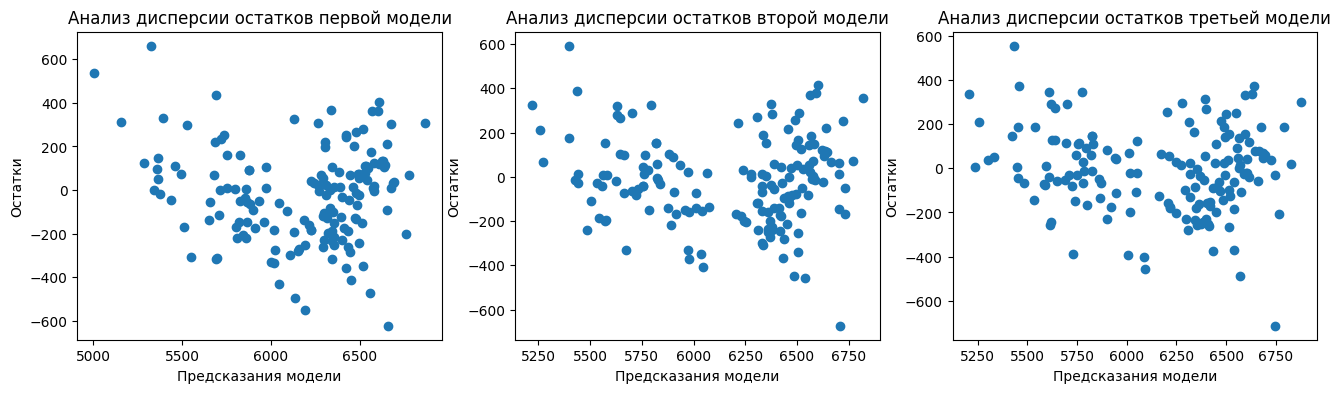

In [50]:
# Сопоставим дисперсию остатков трёх моделей линейной регрессии
# разместим три графика рядом друг с другом
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
axes[0].scatter(x=predictions_1, y=residuals_1)
axes[0].set_xlabel('Предсказания модели')
axes[0].set_ylabel('Остатки')
axes[0].set_title('Анализ дисперсии остатков первой модели')

axes[1].scatter(x=predictions_2, y=residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии остатков второй модели')

axes[2].scatter(x=predictions_3, y=residuals_3)
axes[2].set_xlabel('Предсказания модели')
axes[2].set_ylabel('Остатки')
axes[2].set_title('Анализ дисперсии остатков третьей модели')
plt.show()

Гистограмма распределения остатков третьей модели чуть более симметрична, чем первые две. График дисперсии остатков третьей модели также показывает чуть более постоянную дисперсию, чем два предыдущих графика.  
И всё-таки улучшение не слишком заметное. Видимо, всё-таки линейная модель не очень подходит для нашего датасета.

### Расчет метрик для моделей линейной регрессии
Рассчитаем для каждой модели три метрики: `MSE`, `MAE`, `RMSE`.

In [51]:
# Напишем функцию для расчёта метрик
# функция принимает на вход настоящие и прогнозные значения
def metrics_linear(y_true, y_pred):
    # инициализируем пустой словарь
    metrics = {}
    # рассчитываем и добавляем в словарь метрику `mse`
    mse = mean_squared_error(y_true, y_pred).round(1)
    metrics['mse'] = mse
    # рассчитываем и добавляем в словарь метрику `mae`
    mae = mean_absolute_error(y_true, y_pred).round(1)
    metrics['mae'] = mae
    # рассчитываем и добавляем в словарь метрику `rmse`
    rmse = mean_squared_error(y_true, y_pred, squared=False).round(1)
    metrics['rmse'] = rmse
    # функция возвращает словарь с метриками
    return metrics

In [52]:
# Рассчитаем метрики для трёх моделей линейной регрессии
metriсs_1 = metrics_linear(y_test_1, predictions_1)
metriсs_2 = metrics_linear(y_test_2, predictions_2)
metriсs_3 = metrics_linear(y_test_3, predictions_3)

In [53]:
# Выведем на экран словари метрик для трёх моделей линейной регрессии
print(f'Метрики для первой модели линейной регрессии: {metriсs_1}')
print(f'Метрики для второй модели линейной регрессии: {metriсs_2}')
print(f'Метрики для третьей модели линейной регрессии: {metriсs_3}')

Метрики для первой модели линейной регрессии: {'mse': 46380.3, 'mae': 169.1, 'rmse': 215.4}
Метрики для второй модели линейной регрессии: {'mse': 39310.4, 'mae': 153.9, 'rmse': 198.3}
Метрики для третьей модели линейной регрессии: {'mse': 37065.5, 'mae': 148.8, 'rmse': 192.5}


In [54]:
# Укажем лучшую модель по каждой метрике
# создадим функцию для определения лучшей метрики по каждому виду метрики
# функция принимает на вход ключ словаря
def best_metrics(key):
    # инициализируем переменную с произвольным большим значением
    best_metric = 100000
    # проходим циклом по списку словарей
    for mlist in metric_list:
        # если значение конкретной метрики по ключу в словаре меньше значения в переменной
        if mlist[key] < best_metric:
            # переписываем значение переменной на новое, соответствующее меньшей метрике
            best_metric = mlist[key]
    # функция возвращает итоговое, наименьшее значение конкретной метрики по заданному ключу
    return best_metric

# Проверим работу функции
# задаём список словарей с метриками
metric_list = [metriсs_1, metriсs_2, metriсs_3]
# выбираем наименьшую метрику по ключу `mse`
print(best_metrics('mse'))

37065.5


In [55]:
# Напишем функцию для выявления лучшей модели линейной регрессии по каждой метрике
# функция принимает на вход ключ словаря
def best_model(key):
    # если лучшая (наименьшая) метрика по этому ключу - метрика из первого словаря метрик
    if best_metrics(key) == metriсs_1[key]:
        # то выводим на экран, что лучшая модель по этой метрике - первая
        print(f'Лучшая модель по метрике {key}: первая')
    # если лучшая (наименьшая) метрика по этому ключу - метрика из второго словаря метрик
    elif best_metrics(key) == metriсs_2[key]:
        # то выводим на экран, что лучшая модель по этой метрике - вторая
        print(f'Лучшая модель по метрике {key}: вторая')
    # если лучшая (наименьшая) метрика по этому ключу - метрика из третьего словаря метрик
    elif best_metrics(key) == metriсs_3[key]:
        # то выводим на экран, что лучшая модель по этой метрике - третья
        print(f'Лучшая модель по метрике {key}: третья')
    # если не подходит ни один вариант
    else:
        # ничего не делать
        pass

In [56]:
print(best_model('mse'))
print(best_model('mae'))
print(best_model('rmse'))

Лучшая модель по метрике mse: третья
None
Лучшая модель по метрике mae: третья
None
Лучшая модель по метрике rmse: третья
None


По всем метрикам лучшая модель - третья. Найдём первый, второй и третий квартили для прогнозных значений этой модели и доверительный интервал.

In [57]:
# Воспользуемся функцией `np.quantile()`
Me = np.quantile(predictions_3, 0.5).round(1)
Q1 = np.quantile(predictions_3, 0.25).round(1)
Q3 = np.quantile(predictions_3, 0.75).round(1)
Q_score = (Q3 - Q1).round(1)
border_1 = (Q1 - 1.5 * Q_score).round(1)
border_2 = (Q3 + 1.5 * Q_score).round(1)

print(f'Медиана прогнозных значений удоя: {Me} кг')
print(f'Первый квартиль прогнозных значений удоя: {Q1} кг')
print(f'Третий квартиль прогнозных значений удоя: {Q3} кг')
print(f'Межквартильный размах: {Q_score} кг')
print(f'Граница 1 доверительного интервала: {border_1} кг')
print(f'Граница 2 доверительного интервала: {border_2} кг')

Медиана прогнозных значений удоя: 6307.8 кг
Первый квартиль прогнозных значений удоя: 5783.4 кг
Третий квартиль прогнозных значений удоя: 6505.8 кг
Межквартильный размах: 722.4 кг
Граница 1 доверительного интервала: 4699.8 кг
Граница 2 доверительного интервала: 7589.4 кг


Половина прогнозных значений меньше 6307,8 кг, а другая половина - больше. Половина всех прогнозных значений находится в интервале от 5783,4 до 6505,8 кг. Нормальные прогнозные значения удоя укладываются в промежуток от 4700 до 7589,4 кг.

In [58]:
# Выведем коэффициенты третьей модели линейной регрессии
print(model_lr_3.intercept_, model_lr_3.coef_)

6115.92024526837 [-361.16809866   20.67891164   52.58378854   38.7125529  -219.82661994
  300.9118804   318.58824587   22.45151387  158.18016987   48.60202119]


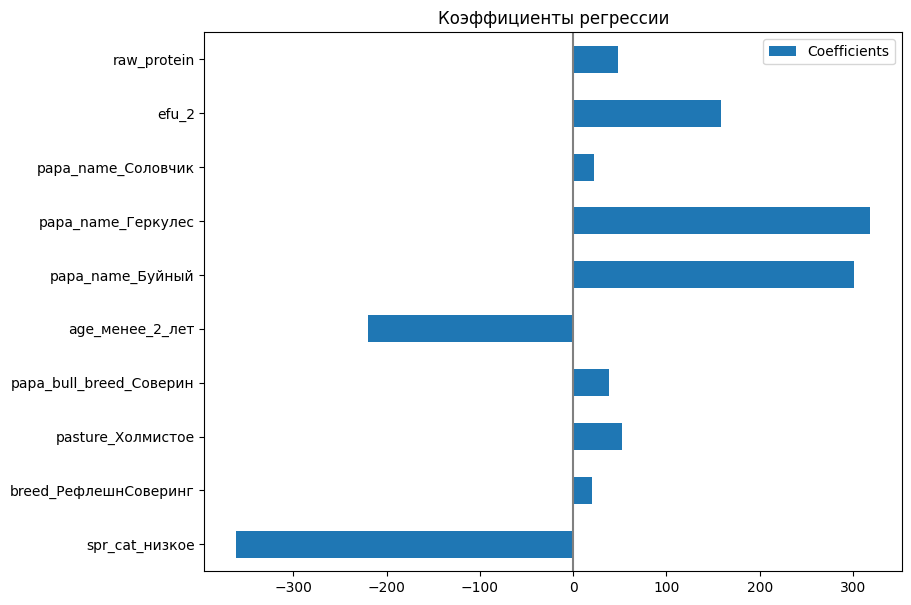

In [59]:
# Изобразим графически коэффициенты
coefs = pd.DataFrame(
    model_lr_3.coef_, columns=["Coefficients"], index=X_train_3.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Коэффициенты регрессии")
plt.axvline(x=0, color=".5")
plt.show()

Как видно на графике, наибольший коэффициент у признака `spr` со значением `низкое`, то есть сильнее всего на удой влияет СПО корма, низкое сахаро-протеиновое соотношение сильно снижает удой, высокое - повышает. Очень сильно влияет на удой то, какой бык является папой коровы, а также возраст коровы (при возрасте менее 2 лет удой ниже). Следующий важный признак - энергетическая кормовая единица, она имеет положительный коэффициент, значительный по величине, то есть повышение ЭКЕ повышает удой.  
Такие признаки, как сырой протеин, порода коровы и её папы, тип пастбища оказывают значительно меньшее влияние на удой.  
Эти выводы подтверждают, что мы не зря добавили новый признак - имя папы коровы - в данные для нашей модели, так как этот признак имеет большое значение.

### Прогноз удоя коров, запланированных к покупке

Данные о коровах, которых фермер хочет купить, находятся в датасете `cow_buy`. Для прогноза удоя нужно добавить в этот датасет недостающие признаки: `efu` (энергетическая кормовая единица), `raw_protein` (сырой протеин, г) и `spr` (сахаро-протеиновое соотношение). Возьмём из датасета `main` средние значения каждого из признаков и увеличим их на 5 %, так как для новых коров планируется увеличить значения каждого из этих параметров на 5 %.

In [60]:
# Добавляем недостающие столбцы, заполняем средними значениями, увеличенными на 5 %
# предварительно создаём копию датафрейма cow_buy
cow = cow_buy.copy()
cow['efu'] = (ferma_main['efu'].mean() * 1.05).round(2)
cow['raw_protein'] = (ferma_main['raw_protein'].mean() * 1.05).round(1)
cow['spr'] = (ferma_main['spr'].mean() * 1.05).round(3)
information(cow)

breed    pasture papa_bull_breed papa_name  fat_content  \
0   Вис Бик Айдиал  Холмистое          Айдиал  Геркулес         3.58   
1   Вис Бик Айдиал  Равнинное         Соверин    Буйный         3.54   
2  РефлешнСоверинг  Равнинное         Соверин     Барин         3.59   
3  РефлешнСоверинг  Холмистое          Айдиал    Буйный         3.40   
4  РефлешнСоверинг  Равнинное          Айдиал    Буйный         3.64   

   protein_content          age    efu  raw_protein    spr  
0            3.076  более_2_лет  15.27       2019.2  0.958  
1            3.081  менее_2_лет  15.27       2019.2  0.958  
2            3.074  более_2_лет  15.27       2019.2  0.958  
3            3.061  более_2_лет  15.27       2019.2  0.958  
4            3.074  более_2_лет  15.27       2019.2  0.958

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            20 non-null     object 
 1   pasture          20 non-null     object 
 2   papa_bull_breed  20 non-null     object 
 3   papa_name        20 non-null     object 
 4   fat_content      20 non-null     float64
 5   protein_content  20 non-null     float64
 6   age              20 non-null     object 
 7   efu              20 non-null     float64
 8   raw_protein      20 non-null     float64
 9   spr              20 non-null     float64
dtypes: float64(5), object(5)
memory usage: 1.7+ KB


None

Чтобы спрогнозировать удой с помощью лучшей третьей модели линейной регрессии, признаки нужно привести к такому же виду, как в этой модели: признак `spr` перевести в категориальный бинарный признак, а вместо признака `efu` использовать новый признак `efu в квадрате`.

In [61]:
# Добавим в датафрейм `cow` столбец `spr_cat` с категориальными значениями СПО
cow['spr_cat'] = cow['spr'].apply(lambda x: 'высокое' if x >= 0.92 else 'низкое')
cow.head()

breed    pasture papa_bull_breed papa_name  fat_content  \
0   Вис Бик Айдиал  Холмистое          Айдиал  Геркулес         3.58   
1   Вис Бик Айдиал  Равнинное         Соверин    Буйный         3.54   
2  РефлешнСоверинг  Равнинное         Соверин     Барин         3.59   
3  РефлешнСоверинг  Холмистое          Айдиал    Буйный         3.40   
4  РефлешнСоверинг  Равнинное          Айдиал    Буйный         3.64   

   protein_content          age    efu  raw_protein    spr  spr_cat  
0            3.076  более_2_лет  15.27       2019.2  0.958  высокое  
1            3.081  менее_2_лет  15.27       2019.2  0.958  высокое  
2            3.074  более_2_лет  15.27       2019.2  0.958  высокое  
3            3.061  более_2_лет  15.27       2019.2  0.958  высокое  
4            3.074  более_2_лет  15.27       2019.2  0.958  высокое

In [62]:
# Добавим в датафрейм `cow` столбец `efu_2` с признаком 'efu в квадрате'
cow['efu_2'] = cow['efu'].apply(lambda x: x**2)
information(cow)

breed    pasture papa_bull_breed papa_name  fat_content  \
0   Вис Бик Айдиал  Холмистое          Айдиал  Геркулес         3.58   
1   Вис Бик Айдиал  Равнинное         Соверин    Буйный         3.54   
2  РефлешнСоверинг  Равнинное         Соверин     Барин         3.59   
3  РефлешнСоверинг  Холмистое          Айдиал    Буйный         3.40   
4  РефлешнСоверинг  Равнинное          Айдиал    Буйный         3.64   

   protein_content          age    efu  raw_protein    spr  spr_cat     efu_2  
0            3.076  более_2_лет  15.27       2019.2  0.958  высокое  233.1729  
1            3.081  менее_2_лет  15.27       2019.2  0.958  высокое  233.1729  
2            3.074  более_2_лет  15.27       2019.2  0.958  высокое  233.1729  
3            3.061  более_2_лет  15.27       2019.2  0.958  высокое  233.1729  
4            3.074  более_2_лет  15.27       2019.2  0.958  высокое  233.1729

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            20 non-null     object 
 1   pasture          20 non-null     object 
 2   papa_bull_breed  20 non-null     object 
 3   papa_name        20 non-null     object 
 4   fat_content      20 non-null     float64
 5   protein_content  20 non-null     float64
 6   age              20 non-null     object 
 7   efu              20 non-null     float64
 8   raw_protein      20 non-null     float64
 9   spr              20 non-null     float64
 10  spr_cat          20 non-null     object 
 11  efu_2            20 non-null     float64
dtypes: float64(6), object(6)
memory usage: 2.0+ KB


None

Тренировочную выборку делаем по образцу третьей модели из датасета `ferma_main_dad`. Тестовой выборкой будет выборка из датасета `cow`.

In [63]:
# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Прогнозная выборка
X_cow = cow[['efu_2', 'raw_protein', 'spr_cat', 'breed', 'pasture', 'papa_bull_breed', 'age', 'papa_name']]

# Выведем на экран количество уникальных значений в категориальных признаках прогнозной выборки
print(X_cow[cat_col_names_3].nunique())

spr_cat            1
breed              2
pasture            2
papa_bull_breed    2
age                2
papa_name          4
dtype: int64


In [64]:
# Кодирование категориальных признаков в прогнозной выборке
X_cow_ohe = encoder_3.transform(X_cow[cat_col_names_3])
encoder_col_names_3 = encoder_3.get_feature_names_out()

# Масштабирование количественных признаков
X_cow_scaled = scaler_3.transform(X_cow[num_col_names_3])


#Создание датафреймов из закодированных и масштабированных данных
X_cow_ohe = pd.DataFrame(X_cow_ohe, columns=encoder_col_names_3)
X_cow_scaled = pd.DataFrame(X_cow_scaled, columns=num_col_names_3)

#X_train_4 = pd.concat([X_train_ohe_4, X_train_scaled_4], axis=1)
X_cow = pd.concat([X_cow_ohe, X_cow_scaled], axis=1)

print(information(X_cow))

spr_cat_низкое  breed_РефлешнСоверинг  pasture_Холмистое  \
0             0.0                    0.0                1.0   
1             0.0                    0.0                0.0   
2             0.0                    1.0                0.0   
3             0.0                    1.0                1.0   
4             0.0                    1.0                0.0   

   papa_bull_breed_Соверин  age_менее_2_лет  papa_name_Буйный  \
0                      0.0              0.0               0.0   
1                      1.0              1.0               1.0   
2                      1.0              0.0               0.0   
3                      0.0              0.0               1.0   
4                      0.0              0.0               1.0   

   papa_name_Геркулес  papa_name_Соловчик     efu_2  raw_protein  
0                 1.0                 0.0  0.554685     0.529538  
1                 0.0                 0.0  0.554685     0.529538  
2                 0.0                 0.0  0.554685     0.529538  
3                 0.0                 0.0  0.554685     0.529538  
4                 0.0                 0.0  0.554685     0.529538

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   spr_cat_низкое           20 non-null     float64
 1   breed_РефлешнСоверинг    20 non-null     float64
 2   pasture_Холмистое        20 non-null     float64
 3   papa_bull_breed_Соверин  20 non-null     float64
 4   age_менее_2_лет          20 non-null     float64
 5   papa_name_Буйный         20 non-null     float64
 6   papa_name_Геркулес       20 non-null     float64
 7   papa_name_Соловчик       20 non-null     float64
 8   efu_2                    20 non-null     float64
 9   raw_protein              20 non-null     float64
dtypes: float64(10)
memory usage: 1.7 KB


None

None


In [65]:
predictions_cow = model_lr_3.predict(X_cow)
predictions_cow

array([6600.56908981, 6349.19486874, 6288.78851993, 6603.57163597,
       6550.98784743, 6387.55014586, 6600.56908981, 6569.02148868,
       6288.78851993, 6383.74501603, 6343.1449107 , 6607.3767658 ,
       6600.56908981, 6100.86677689, 6288.78851993, 6603.57163597,
       6343.1449107 , 6387.55014586, 6569.02148868, 6550.98784743])

**Вывод.** В данном разделе задача линейной регрессии. В качестве целевого признака взят удой. В качестве входных признаков – СПО, ЭКЕ, сырой протеин в корме, возраст коровы, порода коровы, тип пастбища, порода папы коровы. Признаки разделили на количественные и категориальные, затем данные разделили на тренировочную и тестовую выборки.
Количественные признаки масштабировали, категориальные признаки закодировали. Далее инициализировали и обучили модель и рассчитали прогнозные данные по тестовой выборке.  
Для оценки качества рассчитали коэффициент детерминации между реальными значениями целевого признака тестовой выборки и прогнозными значениями. Коэффициент детерминации получили равным 0,80.
Анализ остатков показал, что гистограмма распределения остатков бимодальная, дисперсия остатков неравномерна. Модель требует доработки.
Далее нами были преобразованы признаки `СПО` и `ЭКЕ`, чтобы устранить нелинейность. `СПО` преобразовали в категориальный бинарный признак, а `ЭКЕ` – в `ЭКЕ в квадрате`.
С преобразованными признаками была построена вторая модель линейной регрессии, коэффициент детерминации которой 0,84. Анализ остатков показал улучшение модели, но дисперсия по прежнему неравномерная.
Далее в данные был добавлен дополнительный признак (имя папы коровы) и на этих данных была обучена третья модель, коэффициент детерминации которой составил 0,86. Гистограмма распределения остатков стала практически симметричной, дисперсия остатков стала чуть более равномерной.
Расчет метрик `MSE`, `MAE` и `RMSE` показал, что третья модель является лучшей из трёх обученных моделей.
С помощью третьей модели был рассчитан прогноз удоя коров, запланированных к покупке.

## Обучение модели логистической регрессии
### Подготовка и изучение данных
Для выбора коров с целью их покупки следует спрогнозировать вкус молока. Для этого выполним задачу классификации.  
Вкус молока принимает одно из двух значений: вкусно или не вкусно, то есть стоит задача бинарной классификации. Для задач бинарной классификации подходит логистическая регрессия. С помощью логистической функции эта модель связывает входные признаки с целевым и вычисляет вероятность, с которой объект принадлежит к каждому классу.
Обучим модель логистической регрессии. В качестве целевого признака принимаем `milk_taste` (вкус молока).  
Изучим данные из таблицы `ferma_main`, чтобы узнать, какие из признаков влияют на вкус молока.  
Кроме того, наследственность тоже оказывает влияние на вкус молока, поэтому добавим данные из таблицы `dad` путём слияния по столбцу `id`. Параметр `how='other'` не указываем, чтобы потом не удалять строки с пропусками.

In [66]:
# Добавляем столбец методом `merge`, выводим информацию о датасете и информацию о количестве пропусков и дубликатов
ferma_milk = ferma_main.merge(ferma_dad, on='id')
print(information(ferma_milk))
print('\nКоличество пропущенных значений:')
print(ferma_milk.isna().sum())
print('\nКоличество явных дубликатов:', ferma_milk.duplicated().sum())

yield   efu  raw_protein    spr            breed    pasture  \
id                                                                
1    5863  14.2         1743  0.890   Вис Бик Айдиал  Равнинное   
2    5529  12.8         2138  0.890   Вис Бик Айдиал  Равнинное   
3    5810  14.0         1854  0.885  РефлешнСоверинг  Холмистое   
4    5895  12.4         2012  0.885  РефлешнСоверинг  Холмистое   
5    5302  12.8         1675  0.885   Вис Бик Айдиал  Равнинное   

   papa_bull_breed  fat_content  protein_content milk_taste          age  \
id                                                                         
1           Айдиал         3.58            3.076     вкусно  более_2_лет   
2          Соверин         3.54            3.079     вкусно  менее_2_лет   
3          Соверин         3.59            3.074  не вкусно  более_2_лет   
4           Айдиал         3.40            3.075  не вкусно  более_2_лет   
5          Соверин         3.73            3.073     вкусно  менее_2_лет   

   papa_name  
id            
1     Буйный  
2   Соловчик  
3      Барин  
4     Буйный  
5      Барин

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 1 to 627
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yield            633 non-null    int64  
 1   efu              633 non-null    float64
 2   raw_protein      633 non-null    int64  
 3   spr              633 non-null    float64
 4   breed            633 non-null    object 
 5   pasture          633 non-null    object 
 6   papa_bull_breed  633 non-null    object 
 7   fat_content      633 non-null    float64
 8   protein_content  633 non-null    float64
 9   milk_taste       633 non-null    object 
 10  age              633 non-null    object 
 11  papa_name        633 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 64.3+ KB


None

None

Количество пропущенных значений:
yield              0
efu                0
raw_protein        0
spr                0
breed              0
pasture            0
papa_bull_breed    0
fat_content        0
protein_content    0
milk_taste         0
age                0
papa_name          0
dtype: int64

Количество явных дубликатов: 5


In [67]:
# Избавимся от дубликатов
ferma_milk = ferma_milk.drop_duplicates()
ferma_milk.duplicated().sum()

0

Значения целевого признака необходимо преобразовать в значения `0` и `1`.

In [68]:
# Для преобразования целевого признака `milk_taste` в бинарный признак со значениями `0` и `1`
# добавим в таблицу `ferma_milk` столбец `milk_taste_bin`
ferma_milk['milk_taste_bin'] = ferma_milk['milk_taste'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma_milk.head()

yield   efu  raw_protein    spr            breed    pasture  \
id                                                                
1    5863  14.2         1743  0.890   Вис Бик Айдиал  Равнинное   
2    5529  12.8         2138  0.890   Вис Бик Айдиал  Равнинное   
3    5810  14.0         1854  0.885  РефлешнСоверинг  Холмистое   
4    5895  12.4         2012  0.885  РефлешнСоверинг  Холмистое   
5    5302  12.8         1675  0.885   Вис Бик Айдиал  Равнинное   

   papa_bull_breed  fat_content  protein_content milk_taste          age  \
id                                                                         
1           Айдиал         3.58            3.076     вкусно  более_2_лет   
2          Соверин         3.54            3.079     вкусно  менее_2_лет   
3          Соверин         3.59            3.074  не вкусно  более_2_лет   
4           Айдиал         3.40            3.075  не вкусно  более_2_лет   
5          Соверин         3.73            3.073     вкусно  менее_2_лет   

   papa_name  milk_taste_bin  
id                            
1     Буйный               1  
2   Соловчик               1  
3      Барин               0  
4     Буйный               0  
5      Барин               1

In [69]:
# Напишем функцию построения графиков для количественных признаков
def graph_milk_num(characteristic, feature_title, xlab_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    fig.suptitle(feature_title)
    sns.histplot(data=ferma_milk, x=characteristic, hue='milk_taste_bin', ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    axes[0].set_xlabel(xlab_name)
    sns.violinplot(data=ferma_milk, x=characteristic, hue='milk_taste_bin', ax=axes[1])
    axes[1].set_title('Разброс значений признаков')
    axes[1].set_xlabel(xlab_name)
    plt.show()

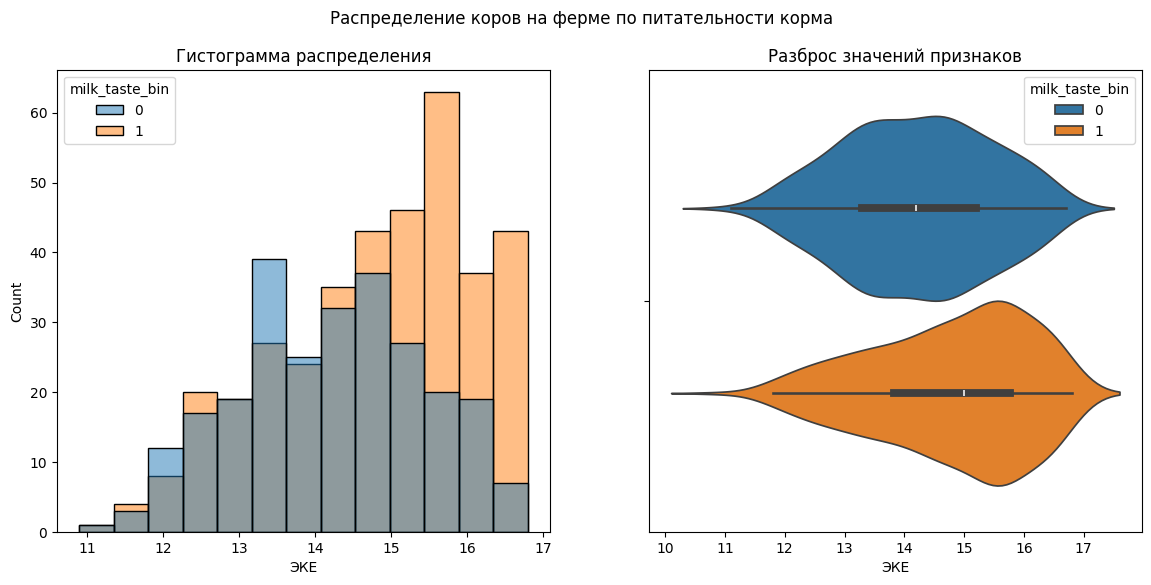

In [70]:
# Построим графики распределения коров по ЭКЕ
graph_milk_num('efu',
             'Распределение коров на ферме по питательности корма',
             'ЭКЕ'
             )

Графики различаются, следовательно, питательность корма влияет на вкус молока. У коров с вкусным молоком питательность корма выше.

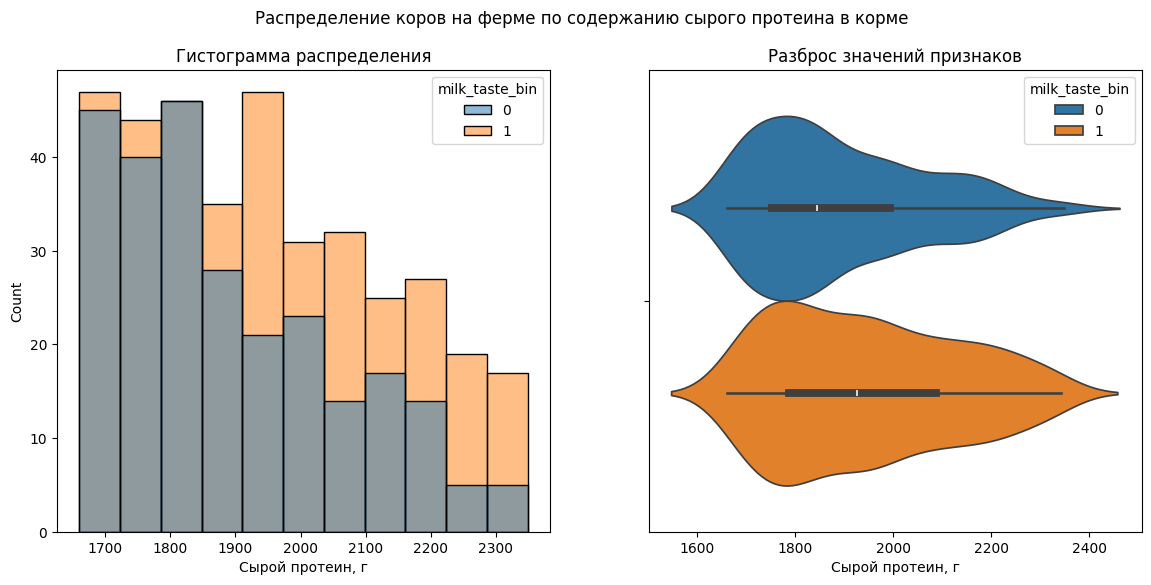

In [71]:
# Построим графики распределения коров по содержанию сырого протеина
graph_milk_num('raw_protein',
             'Распределение коров на ферме по содержанию сырого протеина в корме',
             'Сырой протеин, г'
             )

Графики разные, содержание сырого протеина в корме влияет на вкус молока: у коров с вкусным молоком содержание сырого протеина больше.

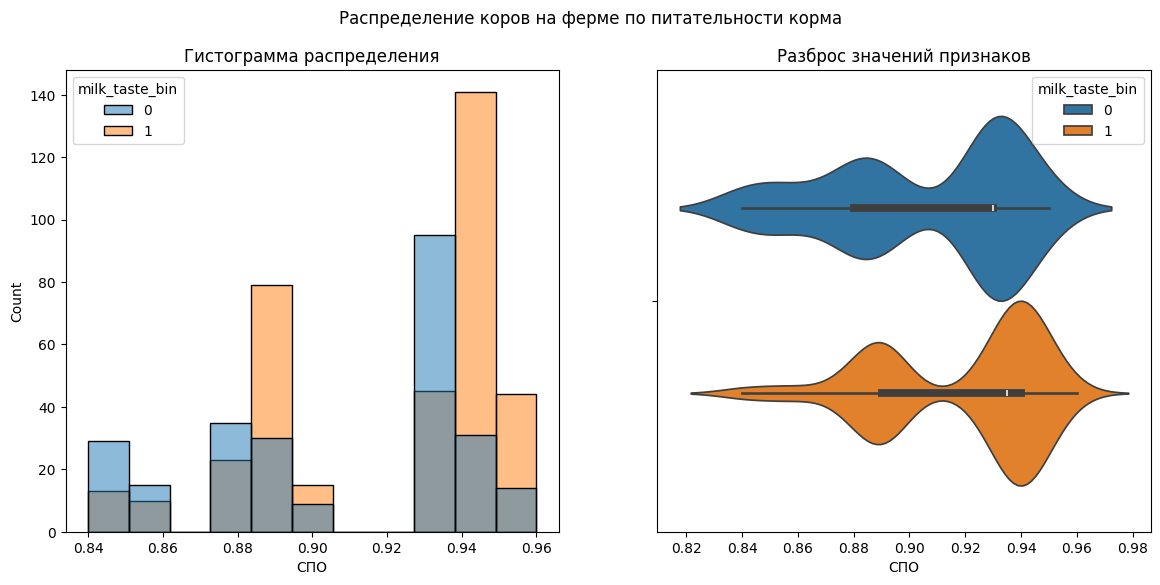

In [72]:
# Построим графики распределения коров по СПО
graph_milk_num('spr',
             'Распределение коров на ферме по питательности корма',
             'СПО'
             )

Графики разные, сахаро-протеиновое соотношение в корме влияет на вкус молока.

Исследование влияния категориальных признаков на целевой выполним с помощью попарных круговых диаграмм. Для этого разобъём датафрейм ferma_milk на два по признаку вкусности: ferma_milk_0 и ferma_milk_1. По этим отдельным данным построим круговые диаграммы.

In [73]:
ferma_milk_0 = ferma_milk.query('milk_taste_bin == 0')
ferma_milk_1 = ferma_milk.query('milk_taste_bin == 1')
display(ferma_milk_0.head())
display(ferma_milk_1.head())

yield   efu  raw_protein    spr            breed    pasture  \
id                                                                
3    5810  14.0         1854  0.885  РефлешнСоверинг  Холмистое   
4    5895  12.4         2012  0.885  РефлешнСоверинг  Холмистое   
14   6131  14.5         1766  0.930  РефлешнСоверинг  Равнинное   
15   6014  16.0         1769  0.930   Вис Бик Айдиал  Равнинное   
19   6461  15.7         2159  0.930  РефлешнСоверинг  Холмистое   

   papa_bull_breed  fat_content  protein_content milk_taste          age  \
id                                                                         
3          Соверин         3.59            3.074  не вкусно  более_2_лет   
4           Айдиал         3.40            3.075  не вкусно  более_2_лет   
14          Айдиал         3.61            3.076  не вкусно  более_2_лет   
15          Айдиал         3.71            3.071  не вкусно  более_2_лет   
19         Соверин         3.72            3.073  не вкусно  более_2_лет   

   papa_name  milk_taste_bin  
id                            
3      Барин               0  
4     Буйный               0  
14    Буйный               0  
15  Геркулес               0  
19  Соловчик               0

yield   efu  raw_protein    spr            breed    pasture  \
id                                                                
1    5863  14.2         1743  0.890   Вис Бик Айдиал  Равнинное   
2    5529  12.8         2138  0.890   Вис Бик Айдиал  Равнинное   
5    5302  12.8         1675  0.885   Вис Бик Айдиал  Равнинное   
6    5254  12.7         1806  0.885  РефлешнСоверинг  Холмистое   
7    5910  13.2         1792  0.885   Вис Бик Айдиал  Равнинное   

   papa_bull_breed  fat_content  protein_content milk_taste          age  \
id                                                                         
1           Айдиал         3.58            3.076     вкусно  более_2_лет   
2          Соверин         3.54            3.079     вкусно  менее_2_лет   
5          Соверин         3.73            3.073     вкусно  менее_2_лет   
6          Соверин         3.13            3.078     вкусно  менее_2_лет   
7          Соверин         3.48            3.077     вкусно  более_2_лет   

   papa_name  milk_taste_bin  
id                            
1     Буйный               1  
2   Соловчик               1  
5      Барин               1  
6      Барин               1  
7   Соловчик               1

In [74]:
# Напишем функцию построения попарных круговых диаграмм для категориальных признаков
# функция принимает на вход два датасета
def graphics_milk_cat(data_milk_0, data_milk_1, feature_title):
    # формирование общей структуры графика
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    fig.suptitle(feature_title)
    # диаграмма для первого датасета
    data_milk_0.plot(kind='pie', ax=axes[0], autopct='%.1f')
    axes[0].set_title('Невкусное молоко')
    # диаграмма для второго датасета
    data_milk_1.plot(kind='pie', ax=axes[1], autopct='%.1f')
    axes[1].set_title('Вкусное молоко')
    plt.show()

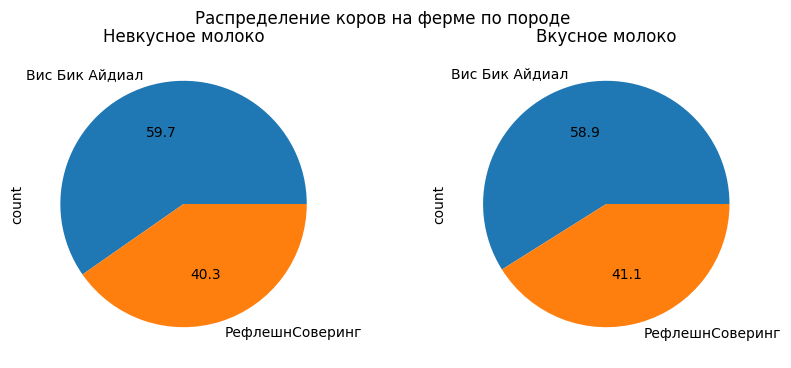

In [75]:
# Построим графики распределения коров по породе
graphics_milk_cat(
    ferma_milk_0['breed'].value_counts(),
    ferma_milk_1['breed'].value_counts(),
    'Распределение коров на ферме по породе'
)

Графики почти одинаковые, порода коровы почти не влияет на вкус молока.

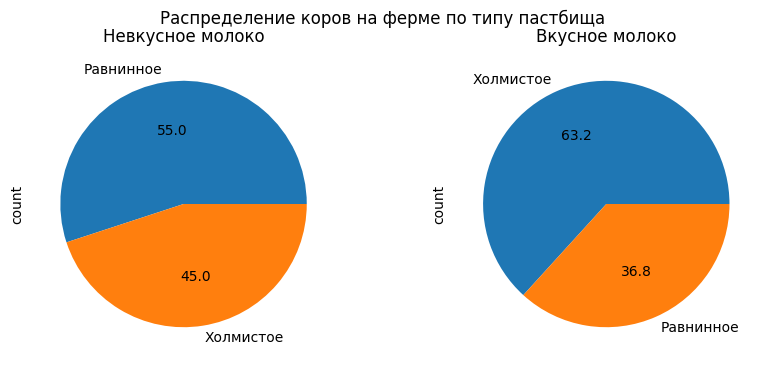

In [76]:
# Построим графики распределения коров по типу пастбища
graphics_milk_cat(
    ferma_milk_0['pasture'].value_counts(),
    ferma_milk_1['pasture'].value_counts(),
    'Распределение коров на ферме по типу пастбища'
)

Графики отличаются, тип пастбища влияет на вкус молока. Среди коров с вкусным молоком больший процент пасётся на холмистых пастбищах.

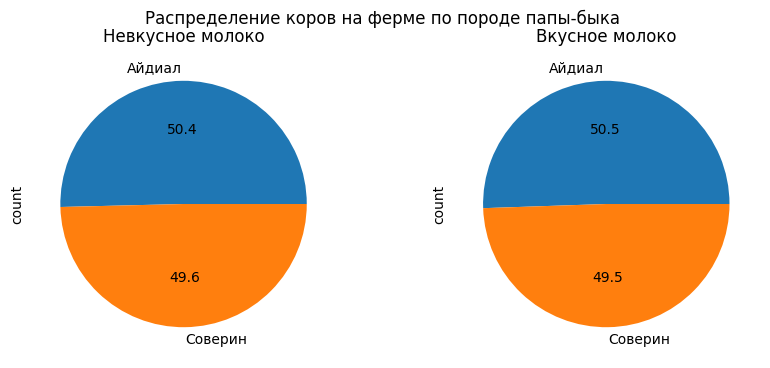

In [77]:
# Построим графики распределения коров по породе папы-быка
graphics_milk_cat(
    ferma_milk_0['papa_bull_breed'].value_counts(),
    ferma_milk_1['papa_bull_breed'].value_counts(),
    'Распределение коров на ферме по породе папы-быка'
)

Графики одинаковые, порода папы-быка не влияет на вкус молока.

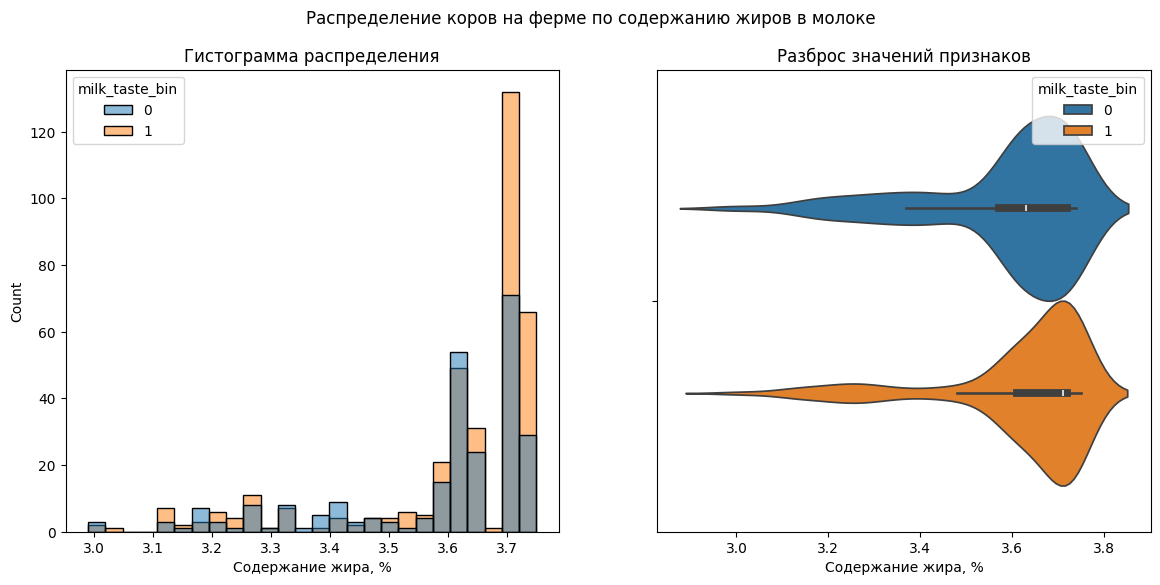

In [78]:
# Построим графики распределения коров по содержанию жиров в молоке
graph_milk_num('fat_content',
             'Распределение коров на ферме по содержанию жиров в молоке',
             'Содержание жира, %'
             )

Графики разные, жирность молока влияет на его вкус. Почти у всех коров с вкусным молоком жирность молока высокая.

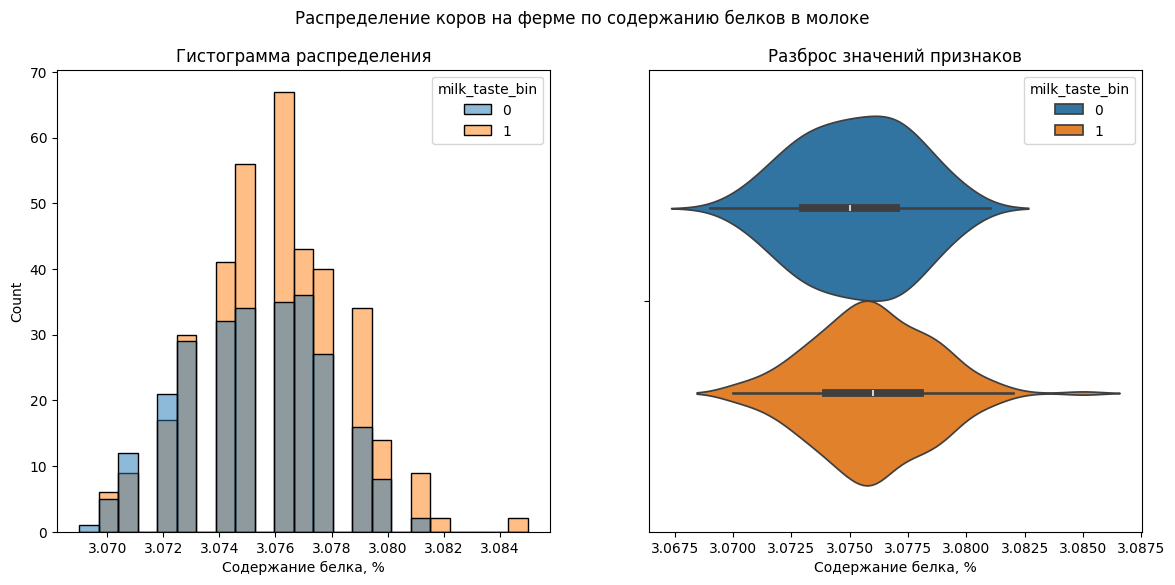

In [79]:
# Построим графики распределения коров по содержанию белков в молоке
graph_milk_num('protein_content',
             'Распределение коров на ферме по содержанию белков в молоке',
             'Содержание белка, %'
             )

Графики разные, содержание белка влияет на вкус молока. У коров с вкусным молоком содержание белка выше.

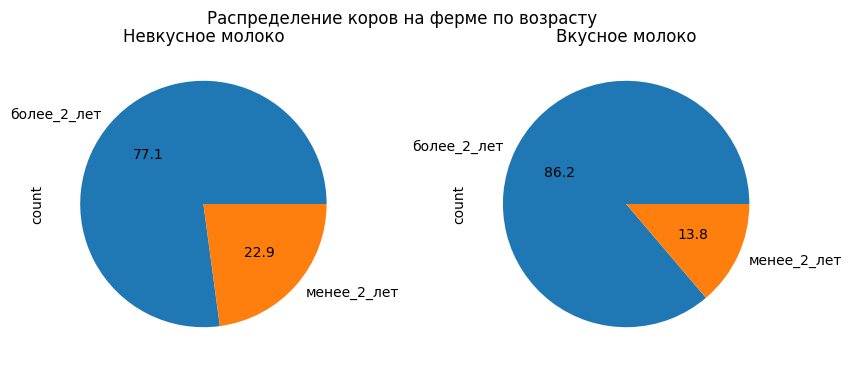

In [80]:
# Построим графики распределения коров по возрасту
graphics_milk_cat(
    ferma_milk_0['age'].value_counts(),
    ferma_milk_1['age'].value_counts(),
    'Распределение коров на ферме по возрасту'
)

Графики разные, возраст коровы влияет на вкус молока.

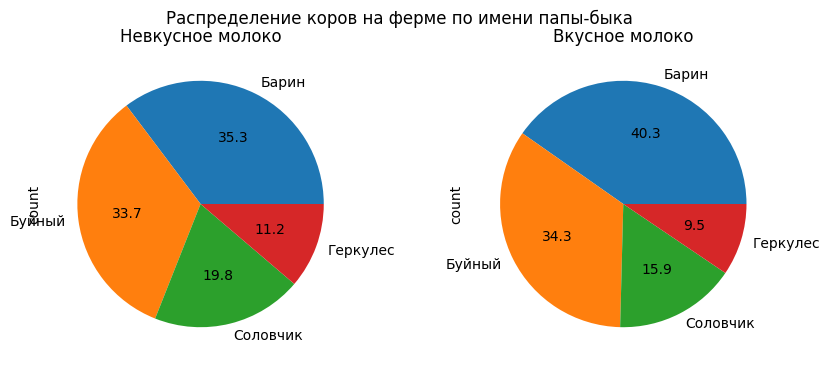

In [81]:
# Построим графики распределения коров по имени папы-быка
graphics_milk_cat(
    ferma_milk_0['papa_name'].value_counts(),
    ferma_milk_1['papa_name'].value_counts(),
    'Распределение коров на ферме по имени папы-быка'
)

Графики разные, имя папы-быка влияет на вкус молока у коровы.

Как показали парные графики, на вкус молока практически не оказывает влияния порода коровы (признак `breed`) и порода папы-быка (признак `papa_bull_breed`). Остальные признаки влияют на целевой, поэтому все остальные признаки мы принимаем за входные. 

### Построение модели
Целевой признак - вкус молока.  
В качестве входных признаков принимаем:  
* характеристики коровы: `pasture` (тип пастбища), `age` (возраст коровы),
* характеристики корма: `efu` (показатель питательности корма коровы), `raw_protein` (содержание сырого протеина в корме, г), `spr` (сахаро-протеиновое соотношение),
* характеристики молока: `fat_content` (жирность, %), `protein_content` (содержание белка). 

Данные нужно разделить на входные признаки и целевой признак. Затем нужно разделить на тренировочную и тестовую выборки. И выбрать отдельно количественные признаки и отдельно категориальные.

In [82]:
# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Сохранение выборок
X_5 = ferma_milk[['efu', 'raw_protein', 'spr', 'pasture', 'fat_content', 'protein_content', 'age', 'papa_name']]
y_5 = ferma_milk['milk_taste_bin']

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(
    X_5,
    y_5,
    random_state = RANDOM_STATE,
    stratify=y_5)

# Список категориальных признаков и список количественных признаков
cat_col_names_5 = ['pasture', 'age', 'papa_name']
num_col_names_5 = ['efu', 'raw_protein', 'spr', 'fat_content', 'protein_content']

# Выведем на экран количество уникальных значений в категориальных признаках тренировочной выборки
print(X_train_5[cat_col_names_5].nunique())

pasture      2
age          2
papa_name    4
dtype: int64


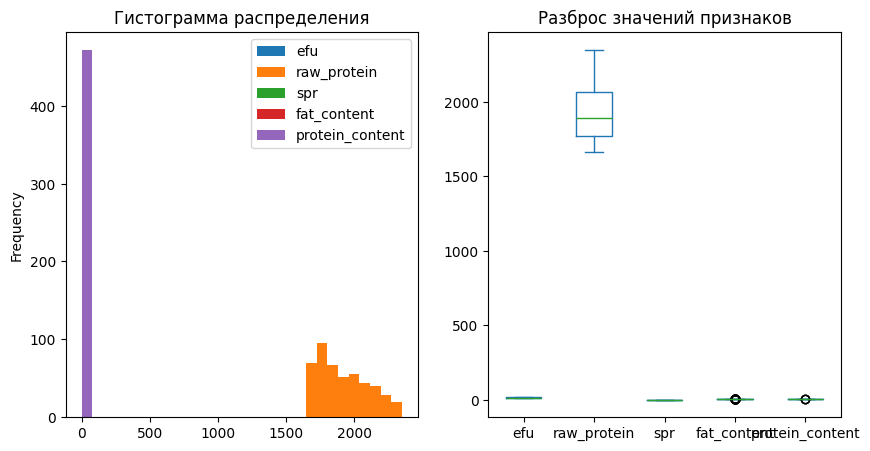

In [83]:
# Построим графики для количественных признаков тренировочного датасета:
# гистограмму частотности распределения и ящик с усами
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train_5[num_col_names_5].plot(kind='hist', bins=30, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_5[num_col_names_5].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признаков')
plt.show()

In [84]:
# Кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_ohe_5 = encoder.fit_transform(X_train_5[cat_col_names_5])
X_test_ohe_5 = encoder.transform(X_test_5[cat_col_names_5])

encoder_col_names_5 = encoder.get_feature_names_out()

# Масштабирование количественных признаков
scaler = StandardScaler()

X_train_scaled_5 = scaler.fit_transform(X_train_5[num_col_names_5])
X_test_scaled_5 = scaler.transform(X_test_5[num_col_names_5])


#Создание датафреймов из закодированных и масштабированных данных
X_train_ohe_5 = pd.DataFrame(X_train_ohe_5, columns=encoder_col_names_5)
X_test_ohe_5 = pd.DataFrame(X_test_ohe_5, columns=encoder_col_names_5)

X_train_scaled_5 = pd.DataFrame(X_train_scaled_5, columns=num_col_names_5)
X_test_scaled_5 = pd.DataFrame(X_test_scaled_5, columns=num_col_names_5)

X_train_5 = pd.concat([X_train_ohe_5, X_train_scaled_5], axis=1)
X_test_5 = pd.concat([X_test_ohe_5, X_test_scaled_5], axis=1)

print(information(X_test_5))

pasture_Холмистое  age_менее_2_лет  papa_name_Буйный  papa_name_Геркулес  \
0                0.0              0.0               0.0                 0.0   
1                1.0              0.0               0.0                 0.0   
2                1.0              0.0               1.0                 0.0   
3                0.0              0.0               1.0                 0.0   
4                0.0              0.0               0.0                 1.0   

   papa_name_Соловчик       efu  raw_protein       spr  fat_content  \
0                 0.0  0.266465     0.660213  0.844801     0.622901   
1                 0.0 -0.271523    -1.216845  0.533210    -1.734114   
2                 0.0  1.035019     1.324319  0.844801     0.684928   
3                 0.0  1.496151    -1.293684  0.844801     0.684928   
4                 0.0 -1.347499    -0.190500 -0.557357     0.002634   

   protein_content  
0        -0.993359  
1         0.156204  
2        -1.376546  
3        -0.993359  
4         1.305766

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pasture_Холмистое   157 non-null    float64
 1   age_менее_2_лет     157 non-null    float64
 2   papa_name_Буйный    157 non-null    float64
 3   papa_name_Геркулес  157 non-null    float64
 4   papa_name_Соловчик  157 non-null    float64
 5   efu                 157 non-null    float64
 6   raw_protein         157 non-null    float64
 7   spr                 157 non-null    float64
 8   fat_content         157 non-null    float64
 9   protein_content     157 non-null    float64
dtypes: float64(10)
memory usage: 12.4 KB


None

None


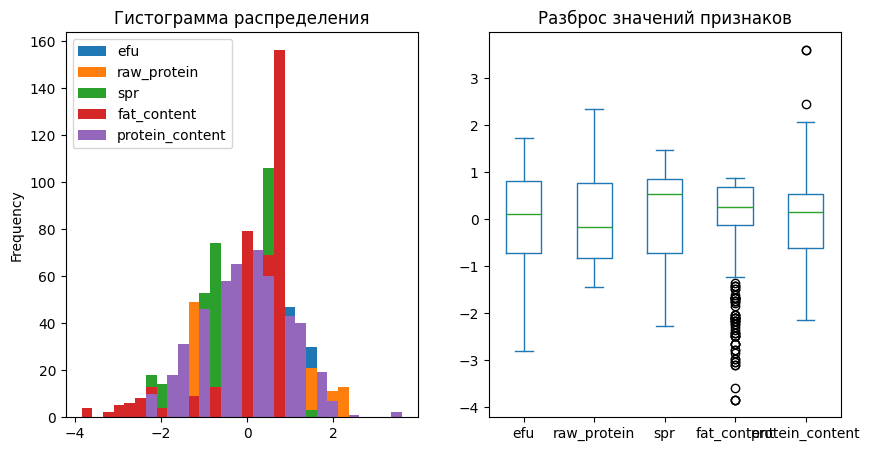

In [85]:
# Построим графики для количественных признаков тренировочного датасета:
# гистограмму частотности распределения и ящик с усами
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train_5[num_col_names_5].plot(kind='hist', bins=30, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_5[num_col_names_5].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признаков')
plt.show()

In [86]:
# Создаём объект для работы с моделью
clf = LogisticRegression(random_state=42)

# Настраиваем модель на данные
clf = clf.fit(X_train_5, y_train_5)

# Получаем прогнозные значения
y_pred = clf.predict(X_test_5)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

### Оценка качества модели

In [87]:
# Проводим оценку точности: рассчитаем метрики accuracy, recall, precision
accuracy = accuracy_score(y_test_5, y_pred)
recall = recall_score(y_test_5, y_pred)
precision = precision_score(y_test_5, y_pred)

print('accuracy: ', round(accuracy, 3))
print('recall: ', round(recall, 3))
print('precision: ', round(precision, 3))

accuracy:  0.592
recall:  0.761
precision:  0.625


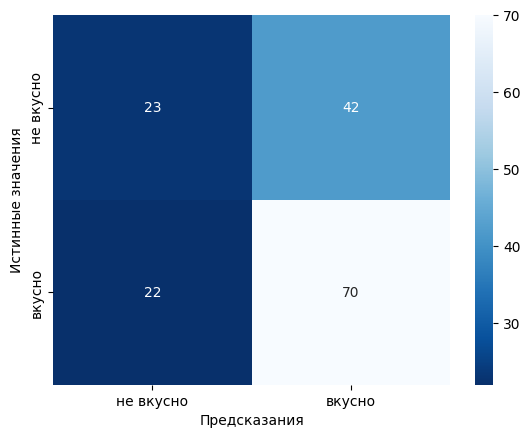

In [88]:
# Построим матрицу ошибок
cm = confusion_matrix(y_test_5, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', xticklabels=['не вкусно', 'вкусно'], yticklabels=['не вкусно', 'вкусно'])
plt.xlabel('Предсказания')
plt.ylabel('Истинные значения')
plt.show()

Судя по метрике `accuracy`, точность модели 59,2 %, то есть модель ошибается в 40,8 % случаев. Причём, где она ошибается, эта метрика не показывает. С одной стороны, она может предсказать невкусное молоко для коровы с вкусным молоком, и тогда фермер не купит корову c хорошим молоком и упустит выгоду. С другой стороны, она может предсказать вкусное молоко для коровы, у которой молоко невкусное, тогда фермер ошибётся и выберет корову, у которой невкусное молоко, потратив деньги по сути на некачественный товар, то есть потерпит убытки. Риски во второй ситуации выше, чем в первой.  
Метрики `recall` и `prediction` показывают, что модель совершает ошибки FP чаще, чем FN, то есть эффективнее избегает ошибок 2-го рода.
Судя по матрице ошибок, 42 раза модель ошибочно предсказывает, что молоко вкусное, когда на самом деле оно не вкусное (ошибка 1-го рода), и 22 раза ошибочно предсказывает, что молоко не вкусное, когда на самом деле оно вкусное (ошибка 2-го рода).
Для заказчика критичнее как раз ошибка 1-го рода, при которой фермер терпит убытки. Необходимо минимизировать ошибки 1-го рода, потому важнее, чтобы метрика `precision` имела высокое значение.  
В этом поможет регулирование порога для определения метки классов.

In [89]:
# Получаем оценки вероятностей для класса
y_proba = clf.predict_proba(X_test_5)[:, 1]

# Создадим таблицу с отсортированными предсказаниями
data = pd.DataFrame(zip(y_test_5, y_proba),
                   columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)

print(data.head())

     y_valid   y_proba
94         1  0.881638
124        1  0.879843
7          1  0.879151
138        1  0.869660
154        1  0.845370


Порог начинаем подбирать с 0.5, так как порог устанавливается для вероятности отнесения к классу 0 или 1. Если мы установим порог меньше, чем 0.5, то мы отнесём к классу 1 (молоко вкусное) корову, у которой молоко вкусное с меньшей верояностью, то есть мы таким образом повысим ошибку класса 1, а нам эти ошибки надо минимизировать. Поэтому нам нужны вероятности большие, чем 0,5.

In [90]:
# Добавим пороги с помощью функции linspace
thresholds = [round(i, 2) for i in np.linspace(0.5, 1, num=10, endpoint=False)]
print(thresholds)

[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


In [91]:
# Создадим расчётные столбцы с предсказаниями для каждого порога
# добавим их в таблицу при помощи lambda-функции
columns = []
precision_metrics = []
recall_metrics = []

for i in thresholds:
    columns.append('y_pred'+str(i))
    data['y_pred'+str(i)] = data['y_proba'].apply(lambda y: 1 if y >= i else 0)
    y_pred_n = data['y_pred'+str(i)]
    precision_metrics.append(precision_score(y_test_5, y_pred_n, zero_division=1))
    recall_metrics.append(recall_score(y_test_5, y_pred_n, zero_division=1))

display(data.sample(5))
print('Метрики precision для выбранных порогов:')
display(precision_metrics)
print('Метрики recall для выбранных порогов:')
display(recall_metrics)

y_valid   y_proba  y_pred0.5  y_pred0.55  y_pred0.6  y_pred0.65  \
23         1  0.808664          1           1          1           1   
55         1  0.804011          1           1          1           1   
153        0  0.540367          1           0          0           0   
27         0  0.477205          0           0          0           0   
115        0  0.466533          0           0          0           0   

     y_pred0.7  y_pred0.75  y_pred0.8  y_pred0.85  y_pred0.9  y_pred0.95  
23           1           1          1           0          0           0  
55           1           1          1           0          0           0  
153          0           0          0           0          0           0  
27           0           0          0           0          0           0  
115          0           0          0           0          0           0

Метрики precision для выбранных порогов:


[0.5714285714285714,
 0.5714285714285714,
 0.5952380952380952,
 0.59375,
 0.5918367346938775,
 0.7142857142857143,
 0.6923076923076923,
 0.75,
 1.0,
 1.0]

Метрики recall для выбранных порогов:


[0.6956521739130435,
 0.6086956521739131,
 0.5434782608695652,
 0.41304347826086957,
 0.31521739130434784,
 0.21739130434782608,
 0.09782608695652174,
 0.03260869565217391,
 0.0,
 0.0]

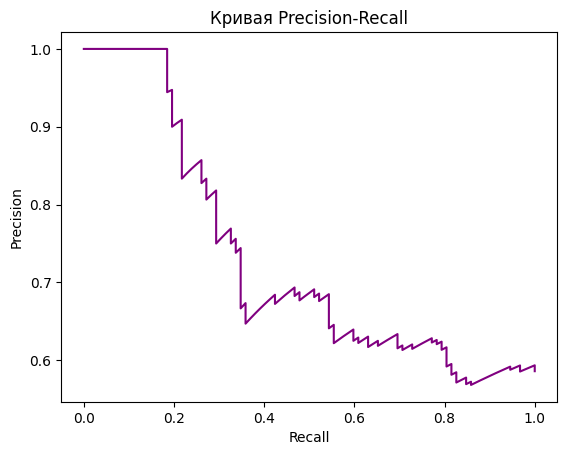

In [92]:
precision_c, recall_c, thresholds_c = precision_recall_curve(y_test_5, y_proba)

# Построим кривую precision-recall
plt.plot(recall_c, precision_c, color='purple')
plt.title('Кривая Precision-Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show() 

Кривая `precision-recall` показывает, что при высоких значениях `precision` значения `recall` низкие и наоборот. При значении `precision`, равном 1, значение `recall` примерно от 0 до 0,2.  


In [93]:
# Создадим таблицу с порогами и их метриками
data_metrics = pd.DataFrame(zip(thresholds, precision_metrics, recall_metrics),
                   columns=['thresholds', 'precision_metrics', 'recall_metrics'])

print(data_metrics)

   thresholds  precision_metrics  recall_metrics
0        0.50           0.571429        0.695652
1        0.55           0.571429        0.608696
2        0.60           0.595238        0.543478
3        0.65           0.593750        0.413043
4        0.70           0.591837        0.315217
5        0.75           0.714286        0.217391
6        0.80           0.692308        0.097826
7        0.85           0.750000        0.032609
8        0.90           1.000000        0.000000
9        0.95           1.000000        0.000000


Самое лучшее значение порога `0.90`, при нём метрика `precition` достигает единицы, дальше уже ошибки `FalsePositive` уменьшать некуда. Если установить порог классификации `0.90`, то фермер избежит ошибки, когда он купит корову, ожидая, что у неё вкусное молоко, а молоко окажется невкусным.
Однако при этом метрика `recall` почти равна нулю, то есть ошибки `FalseNegative` могут быть значительными. То есть фермер слишком часто будет отказываться покупать корову с вкусным молоком, предполагая, что оно будет невкусным. При таком высоком пороге может оказаться мало или не оказаться совсем коров, удовлетворяющих таким высоким требованиям. И фермеру нечем будет пополнить стадо.  
Необходимо найти компромиссное решение. Выберем такой порог, при котором метрика `precision` достаточно высокой, но и метрика `recall` не близка к нулю.  
 
Построим график значенй метрики `precision` при разных значениях порогов.

In [94]:
# Проверим число значений `thresholds_c` и `precision_c`, рассчитанных с помощью функции `precision_recall_curve`
print(len(thresholds_c))
print(len(precision_c))

157
158


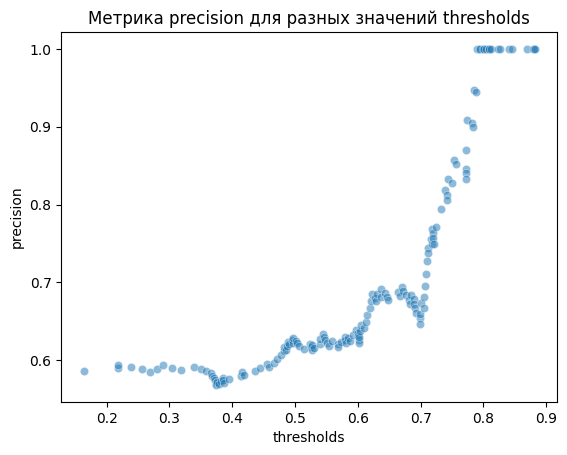

In [95]:
# Построим график по этим значениям, уравняв длину массивов
sns.scatterplot(x=thresholds_c, y=precision_c[:-1],  alpha=0.5)
plt.title('Метрика precision для разных значений thresholds')
plt.xlabel('thresholds')
plt.ylabel('precision')
plt.show()

Лучшим порогом, как видно на этом графике, является порог 0.8.  

Итак, для оптимизации ошибок 1-го и 2-го рода выберем порог `0.80`, при котором по таблице `data_metrics` метрика `precision` равна `0.79`, а метрика `recall` равна `0.12`. 

### Прогноз вкуса молока коров, запланированных к покупке

С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете `cow_buy`. Выполним подготовку данных.

In [96]:
# Добавляем недостающие столбцы, заполняем средними значениями, увеличенными на 5 %
# предварительно создаём копию датафрейма cow_milk
cow_milk = cow_buy.copy()
cow_milk['efu'] = (ferma_main['efu'].mean() * 1.05).round(2)
cow_milk['raw_protein'] = (ferma_main['raw_protein'].mean() * 1.05).round(1)
cow_milk['spr'] = (ferma_main['spr'].mean() * 1.05).round(3)
information(cow_milk)

breed    pasture papa_bull_breed papa_name  fat_content  \
0   Вис Бик Айдиал  Холмистое          Айдиал  Геркулес         3.58   
1   Вис Бик Айдиал  Равнинное         Соверин    Буйный         3.54   
2  РефлешнСоверинг  Равнинное         Соверин     Барин         3.59   
3  РефлешнСоверинг  Холмистое          Айдиал    Буйный         3.40   
4  РефлешнСоверинг  Равнинное          Айдиал    Буйный         3.64   

   protein_content          age    efu  raw_protein    spr  
0            3.076  более_2_лет  15.27       2019.2  0.958  
1            3.081  менее_2_лет  15.27       2019.2  0.958  
2            3.074  более_2_лет  15.27       2019.2  0.958  
3            3.061  более_2_лет  15.27       2019.2  0.958  
4            3.074  более_2_лет  15.27       2019.2  0.958

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            20 non-null     object 
 1   pasture          20 non-null     object 
 2   papa_bull_breed  20 non-null     object 
 3   papa_name        20 non-null     object 
 4   fat_content      20 non-null     float64
 5   protein_content  20 non-null     float64
 6   age              20 non-null     object 
 7   efu              20 non-null     float64
 8   raw_protein      20 non-null     float64
 9   spr              20 non-null     float64
dtypes: float64(5), object(5)
memory usage: 1.7+ KB


None

Тренировочную выборку делаем по образцу подготовки данных для нашей модели из датасета `ferma_milk`. Тестовой выборкой будет выборка из датасета `cow_milk`.

In [97]:
# Прогнозная выборка
X_cow_milk = cow_milk[['efu', 'raw_protein', 'spr', 'pasture', 'fat_content', 'protein_content', 'age', 'papa_name']]

# Выведем на экран количество уникальных значений в категориальных признаках прогнозной выборки
print(X_cow_milk[cat_col_names_5].nunique())

pasture      2
age          2
papa_name    4
dtype: int64


In [98]:
# Кодирование категориальных признаков прогнозной выборки
X_cow_milk_ohe = encoder.transform(X_cow_milk[cat_col_names_5])

# Масштабирование количественных признаков
X_cow_milk_scaled = scaler.transform(X_cow_milk[num_col_names_5])


#Создание датафреймов из закодированных и масштабированных данных
X_cow_milk_ohe = pd.DataFrame(X_cow_milk_ohe, columns=encoder_col_names_5)
X_cow_milk_scaled = pd.DataFrame(X_cow_milk_scaled, columns=num_col_names_5)
X_cow_milk = pd.concat([X_cow_milk_ohe, X_cow_milk_scaled], axis=1)

print(information(X_cow_milk))

pasture_Холмистое  age_менее_2_лет  papa_name_Буйный  papa_name_Геркулес  \
0                1.0              0.0               0.0                 1.0   
1                0.0              1.0               1.0                 0.0   
2                0.0              0.0               0.0                 0.0   
3                1.0              0.0               1.0                 0.0   
4                0.0              0.0               1.0                 0.0   

   papa_name_Соловчик      efu  raw_protein       spr  fat_content  \
0                 0.0  0.55083     0.529588  1.405664    -0.183446   
1                 0.0  0.55083     0.529588  1.405664    -0.431553   
2                 0.0  0.55083     0.529588  1.405664    -0.121420   
3                 0.0  0.55083     0.529588  1.405664    -1.299927   
4                 0.0  0.55083     0.529588  1.405664     0.188714   

   protein_content  
0         0.156204  
1         2.072142  
2        -0.610171  
3        -5.591609  
4        -0.610171

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pasture_Холмистое   20 non-null     float64
 1   age_менее_2_лет     20 non-null     float64
 2   papa_name_Буйный    20 non-null     float64
 3   papa_name_Геркулес  20 non-null     float64
 4   papa_name_Соловчик  20 non-null     float64
 5   efu                 20 non-null     float64
 6   raw_protein         20 non-null     float64
 7   spr                 20 non-null     float64
 8   fat_content         20 non-null     float64
 9   protein_content     20 non-null     float64
dtypes: float64(10)
memory usage: 1.7 KB


None

None


In [99]:
# Прогноз вкуса молока с использованием порога по умолчанию 0.5
y_pred_milk_first = clf.predict(X_cow_milk)
y_pred_milk_first

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [100]:
# Получаем оценки вероятностей для класса
y_proba_milk = clf.predict_proba(X_cow_milk)[:, 1]

# Создаём таблицу с прогнозом вкуса молока при пороге 0.5 и с вероятностями для классификации вкуса молока
data_pred_milk = pd.DataFrame(zip(y_pred_milk_first, y_proba_milk), columns=['pred_milk_first', 'y_proba_milk'])

# Проверим
data_pred_milk

pred_milk_first  y_proba_milk
0                 1      0.702596
1                 1      0.726807
2                 1      0.674195
3                 1      0.553573
4                 1      0.616123
5                 0      0.157019
6                 1      0.702596
7                 1      0.716280
8                 1      0.674195
9                 1      0.817539
10                0      0.279198
11                0      0.484197
12                0      0.170175
13                1      0.798913
14                1      0.674195
15                1      0.629388
16                1      0.718778
17                0      0.141814
18                1      0.583362
19                1      0.616123

In [101]:
# Задаём лучшее значение порога классификации 0.9
threshold_best = 0.90

# Добавляем в таблицу `data_pred_milk` столбец с прогнозом вкуса молока при пороге 0.9
data_pred_milk['pred_milk_best'] = data_pred_milk['y_proba_milk'].apply(lambda x: 1 if x>threshold_best else 0)

# Выводим результат
data_pred_milk

pred_milk_first  y_proba_milk  pred_milk_best
0                 1      0.702596               0
1                 1      0.726807               0
2                 1      0.674195               0
3                 1      0.553573               0
4                 1      0.616123               0
5                 0      0.157019               0
6                 1      0.702596               0
7                 1      0.716280               0
8                 1      0.674195               0
9                 1      0.817539               0
10                0      0.279198               0
11                0      0.484197               0
12                0      0.170175               0
13                1      0.798913               0
14                1      0.674195               0
15                1      0.629388               0
16                1      0.718778               0
17                0      0.141814               0
18                1      0.583362               0
19                1      0.616123               0

Не предсказано ни одной коровы с вкусным молоком.

In [102]:
# Задаём компромиссное значение порога классификации 0.8
threshold_recommended = 0.80

# Добавляем в таблицу `data_pred_milk` столбец с прогнозом вкуса молока при пороге 0.8
data_pred_milk['pred_milk_recommended'] = data_pred_milk['y_proba_milk'].apply(
    lambda x: 1 if x>threshold_recommended else 0)

# Выводим результат
data_pred_milk

pred_milk_first  y_proba_milk  pred_milk_best  pred_milk_recommended
0                 1      0.702596               0                      0
1                 1      0.726807               0                      0
2                 1      0.674195               0                      0
3                 1      0.553573               0                      0
4                 1      0.616123               0                      0
5                 0      0.157019               0                      0
6                 1      0.702596               0                      0
7                 1      0.716280               0                      0
8                 1      0.674195               0                      0
9                 1      0.817539               0                      1
10                0      0.279198               0                      0
11                0      0.484197               0                      0
12                0      0.170175               0                      0
13                1      0.798913               0                      0
14                1      0.674195               0                      0
15                1      0.629388               0                      0
16                1      0.718778               0                      0
17                0      0.141814               0                      0
18                1      0.583362               0                      0
19                1      0.616123               0                      0

У одной коровы предсказано вкусное молоко.

**Вывод.** Задача классификации выполнена с помощью модели логистической регрессии. Целевой признак – вкус молока (вкусно, не вкусно). В качестве входных признаков приняты порода коровы, возраст коровы, ЭКЕ, сырой протеин в корме, СПО, жирность молока, содержание белка в молоке. Кроме того, дополнительно добавили признак имя папы.
Целевой признак вкус молока преобразовали в бинарный признак со значениями 0 и 1.
Данные разделили на тренировочную и тестовую выборки. Количественные признаки масштабировали, категориальные кодировали. Настроили модель и получили прогнозные значения на тестовой выборке.
Метрики оценки качества модели и матрица ошибок показали, что точность модели 62,4 %. Причем модель совершает ошибки FalsePositive чаще, чем FalseNegative. Ошибки 1-го рода (FalsePositive) для заказчика критичнее, так как высок риск купить корову, дающую невкусное молоко, считая, что оно вкусное.
Были проверены различные пороги классификации и для дальнейшего прогноза был выбран порог 0,8. С этим порогом был рассчитан прогноз вкуса молока для коров, предлагаемых к покупке фермеру.  
У одной коровы из предлагаемых на продажу, спрогнозировано вкусное молоко.

## Итоговые выводы
### Отбор коров для покупки
Добавим прогнозы вкуса молока и удоя коров "ЭкоФермы" в датафрейм с коровами, покупку которых рассматривает фермер. Затем отберём коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [103]:
# Создадим копию датафрейма `cow_buy` - `cow_buy_predict`
cow_buy_predict = cow_buy.copy()

# В датафрейм `cow_buy_predict` добавим столбец `yield_predict` с прогнозом удоя, рассчитанным в п. 5.6
cow_buy_predict['yield_predict'] = predictions_cow.round(1)

# В датафрейм `cow_buy_predict` добавим столбец `milk_taste_predict` с прогнозом вкуса молока, рассчитанным в п. 6.3
cow_buy_predict['milk_taste_predict'] = data_pred_milk['pred_milk_recommended']

# Проверим
cow_buy_predict

breed    pasture papa_bull_breed papa_name  fat_content  \
0    Вис Бик Айдиал  Холмистое          Айдиал  Геркулес         3.58   
1    Вис Бик Айдиал  Равнинное         Соверин    Буйный         3.54   
2   РефлешнСоверинг  Равнинное         Соверин     Барин         3.59   
3   РефлешнСоверинг  Холмистое          Айдиал    Буйный         3.40   
4   РефлешнСоверинг  Равнинное          Айдиал    Буйный         3.64   
5   РефлешнСоверинг  Равнинное         Соверин  Геркулес         3.63   
6    Вис Бик Айдиал  Холмистое          Айдиал  Геркулес         3.58   
7    Вис Бик Айдиал  Равнинное         Соверин    Буйный         3.57   
8   РефлешнСоверинг  Равнинное         Соверин     Барин         3.59   
9   РефлешнСоверинг  Холмистое          Айдиал    Буйный         3.40   
10   Вис Бик Айдиал  Холмистое         Соверин  Соловчик         3.73   
11  РефлешнСоверинг  Равнинное         Соверин  Геркулес         3.73   
12   Вис Бик Айдиал  Холмистое          Айдиал  Геркулес         3.68   
13   Вис Бик Айдиал  Холмистое         Соверин     Барин         3.42   
14  РефлешнСоверинг  Равнинное         Соверин     Барин         3.59   
15  РефлешнСоверинг  Холмистое          Айдиал    Буйный         3.40   
16   Вис Бик Айдиал  Холмистое         Соверин  Соловчик         3.73   
17  РефлешнСоверинг  Равнинное         Соверин  Геркулес         3.77   
18   Вис Бик Айдиал  Равнинное         Соверин    Буйный         3.34   
19  РефлешнСоверинг  Равнинное          Айдиал    Буйный         3.64   

    protein_content          age  yield_predict  milk_taste_predict  
0             3.076  более_2_лет         6600.6                   0  
1             3.081  менее_2_лет         6349.2                   0  
2             3.074  более_2_лет         6288.8                   0  
3             3.061  более_2_лет         6603.6                   0  
4             3.074  более_2_лет         6551.0                   0  
5             3.053  менее_2_лет         6387.6                   0  
6             3.076  более_2_лет         6600.6                   0  
7             3.079  более_2_лет         6569.0                   0  
8             3.074  более_2_лет         6288.8                   0  
9             3.079  менее_2_лет         6383.7                   1  
10            3.055  более_2_лет         6343.1                   0  
11            3.073  более_2_лет         6607.4                   0  
12            3.046  более_2_лет         6600.6                   0  
13            3.075  менее_2_лет         6100.9                   0  
14            3.074  более_2_лет         6288.8                   0  
15            3.065  более_2_лет         6603.6                   0  
16            3.079  более_2_лет         6343.1                   0  
17            3.053  менее_2_лет         6387.6                   0  
18            3.069  более_2_лет         6569.0                   0  
19            3.074  более_2_лет         6551.0                   0

In [104]:
# Выберем из датафрейма `cow_buy_predict` строки со значениями более 6000 в столбце `yield_predict`
# и значениями 1 в столбце `milk_taste_predict`
cow_buy_recommended = cow_buy_predict[(
    cow_buy_predict['yield_predict'] >= 6000
) & cow_buy_predict['milk_taste_predict'] == 1]
cow_buy_recommended

breed    pasture papa_bull_breed papa_name  fat_content  \
9  РефлешнСоверинг  Холмистое          Айдиал    Буйный          3.4   

   protein_content          age  yield_predict  milk_taste_predict  
9            3.079  менее_2_лет         6383.7                   1

### Результаты работы моделей для фермера
Нами построены модели линейной регрессии для прогноза удоя и логистической регрессии для прогноза вкуса молока. По построенным моделям и рассчитанным прогнозам составлен список коров, рекомендованных фермеру к покупке. Это только одна корова из 20 предложенных, у которой и прогноз удоя более 6000 кг, и молоко спрогнозировано вкусное. Риск ошибки предсказания вкусного молока у коровы с невкусным молоком - 20 %. Это минимальный риск для фермера, так как при снижении возможности ошибки подходящих коров не останется.  
Если фермеру одной коровы для покупки недостаточно, можно снизить порог классификации, и тогда количество предложенных коров будет больше. Нами сформировала выборка из одной коровы с наилучшими прогнозными показателями.

### Выводы о моделях, использованных в работе
Для улучшения качества регрессионной модели были использованы следующие способы:  
1) исключение нелинейности входных признаков с целевым: признак `СПО` был преобразован в категориальный бинарный признак, так как на диаграмме рассеяния наблюдения были сгруппированы в два кластера с чёткой границей между кластерами; признак `ЭКЕ` был преобразован в признак `ЭКЕ в квадрате`, так как на диаграмме рассеяния зависимость между этим признаком и целевым была похожа на квадратичную;
2) добавление нового признака в существующие данные (имя папы коровы), так как этот признак также имеет влияние на целевой признак.  
Дальнейшее улучшение качества регрессионной модели невозможно, так как другой информации, которую можно добавить в существующие данные, нет.  
При использовании модели классификации, в частности, логистической регрессии, важны метрики, которые не только показывают ошибки и верные предсказания, но и анализируют ошибки разного рода, это метрики `recall` и `precision`.